In [641]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Newspapers:
https://scholar.colorado.edu/concern/datasets/pg15bg711
## Most relevant newspapers:
The New York Times;
The Washington Post
The Wall Street Journal
Los Angeles Times

Topics: Climate Change, abortion, drug legalization, vaccination

In [642]:
all_df = pd.read_csv('data/extended.csv')

all_df = all_df[all_df['Subject Terms'].notna() & (all_df['Subject Terms'] != '')]

# Ensure the 'Date' column is in datetime format
all_df['Date'] = pd.to_datetime(all_df['Date'], errors='coerce')

# Filter rows where the year is 1990 or later
all_df = all_df[all_df['Date'].dt.year >= 2015]
all_df = all_df[all_df['Date'] < '2022-03-01']

all_df.to_csv('data/news-all-df.csv')


In [643]:
all_wp = all_df[all_df['Publication Title'].str.contains('Washington Post', case=False, na=False)]
all_nyt = all_df[all_df['Publication Title'].str.contains('New York Times', case=False, na=False)]
all_lat = all_df[all_df['Publication Title'].str.contains('Los Angeles Times', case=False, na=False)]
all_wsj = all_df[all_df['Publication Title'].str.contains('Wall Street Journal', case=False, na=False)]

all_wp.to_csv('data/news-all-wp.csv')
all_nyt.to_csv('data/news-all-nyt.csv')
all_lat.to_csv('data/news-all-lat.csv')
all_wsj.to_csv('data/news-all-wsj.csv')

/var/folders/5y/qk40s5mj3n330pjcftfym3180000gn/T/ipykernel_6448/3767469172.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Year'] = pd.to_datetime(dataset['Date']).dt.year  # Extract year if 'Date' column exists
/var/folders/5y/qk40s5mj3n330pjcftfym3180000gn/T/ipykernel_6448/3767469172.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Year'] = pd.to_datetime(dataset['Date']).dt.year  # Extract year if 'Date' column exists
/var/folders/5y/qk40s5mj3n330pjcftfym3180000gn/T/ipykernel_644

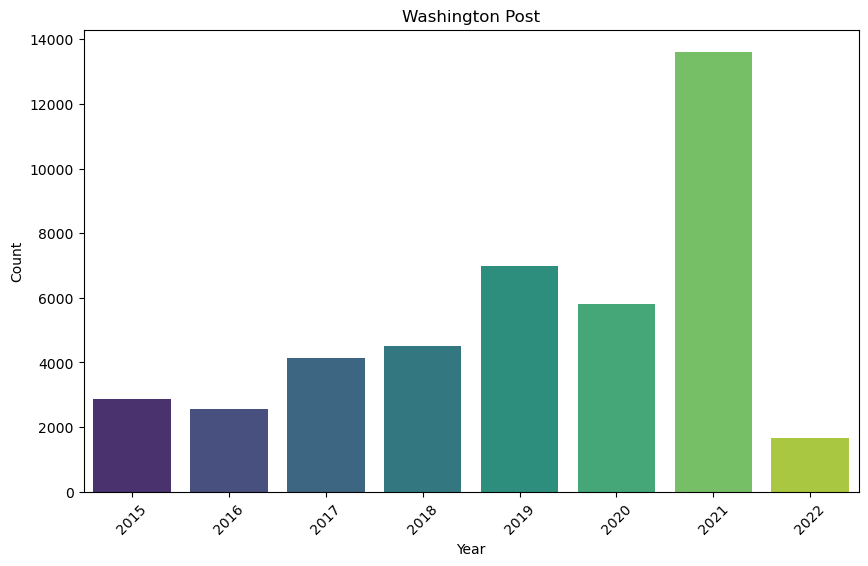

/var/folders/5y/qk40s5mj3n330pjcftfym3180000gn/T/ipykernel_6448/3767469172.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=nyt_data, x='Year', y='Count', palette='viridis')


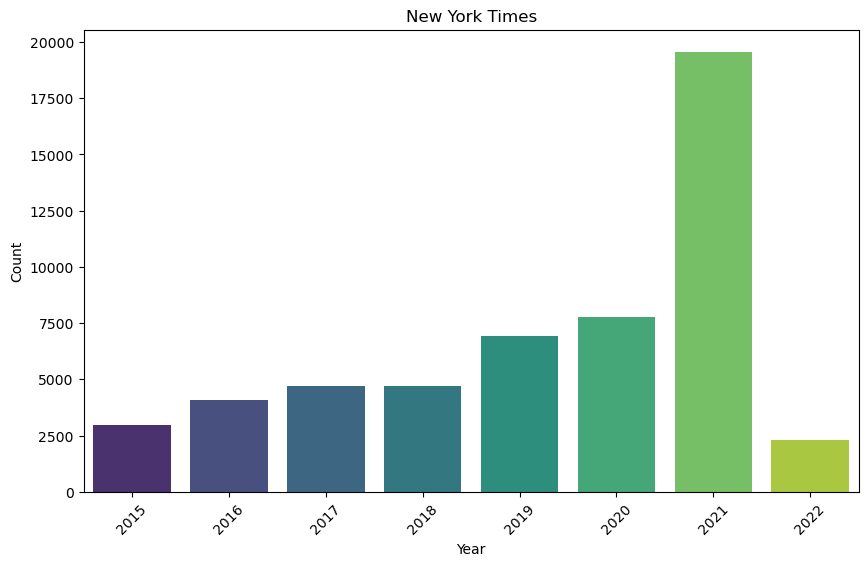

/var/folders/5y/qk40s5mj3n330pjcftfym3180000gn/T/ipykernel_6448/3767469172.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=lat_data, x='Year', y='Count', palette='viridis')


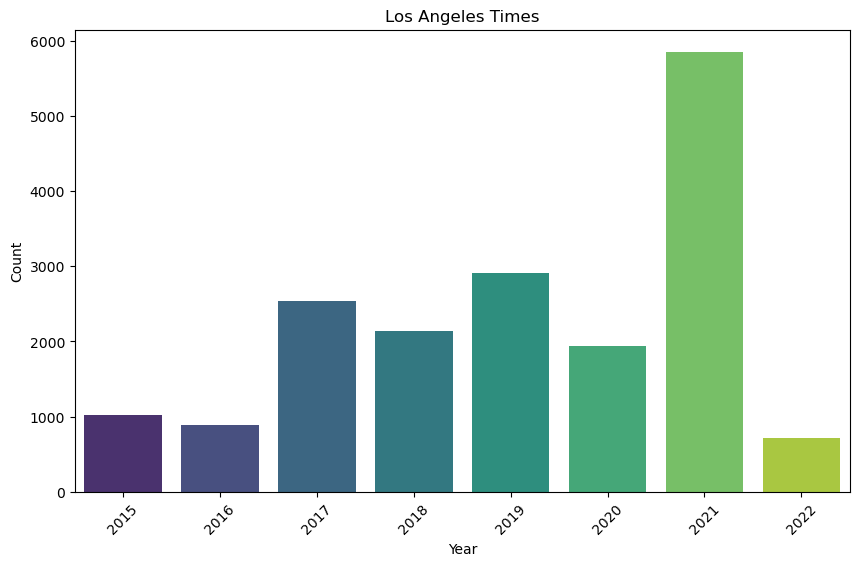

/var/folders/5y/qk40s5mj3n330pjcftfym3180000gn/T/ipykernel_6448/3767469172.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=wsj_data, x='Year', y='Count', palette='viridis')


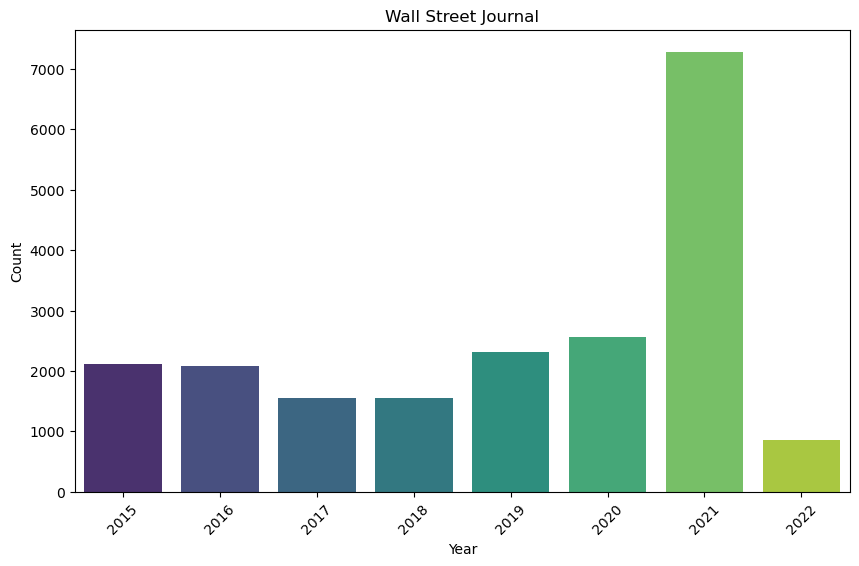

In [644]:
def process_dataset(dataset, label):
    dataset['Year'] = pd.to_datetime(dataset['Date']).dt.year  # Extract year if 'Date' column exists
    values_by_year = dataset.groupby('Year').size().reset_index(name='Count')  # Count rows per year
    values_by_year['Label'] = label  # Add a label for the dataset
    return values_by_year

# Process each dataset
wp_data = process_dataset(all_wp, 'Washington Post')
nyt_data = process_dataset(all_nyt, 'New York Times')
lat_data = process_dataset(all_lat, 'Los Angeles Times')
wsj_data = process_dataset(all_wsj, 'Wall Street Journal')

# Plot Washington Post data
plt.figure(figsize=(10, 6))
sns.barplot(data=wp_data, x='Year', y='Count', palette='viridis')
plt.title('Washington Post')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plot New York Times data
plt.figure(figsize=(10, 6))
sns.barplot(data=nyt_data, x='Year', y='Count', palette='viridis')
plt.title('New York Times')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plot Los Angeles Times data
plt.figure(figsize=(10, 6))
sns.barplot(data=lat_data, x='Year', y='Count', palette='viridis')
plt.title('Los Angeles Times')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plot Wall Street Journal data
plt.figure(figsize=(10, 6))
sns.barplot(data=wsj_data, x='Year', y='Count', palette='viridis')
plt.title('Wall Street Journal')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Social Media data

In [645]:
social_media_df = pd.read_csv("data/gsmatwitter.csv")

# Ensure the 'date' column is in datetime format
social_media_df['date'] = pd.to_datetime(social_media_df['date'], errors='coerce')
social_media_df.to_csv('data/sm-all.csv')

Separating by topic

In [646]:
climate_sm = social_media_df[['date', 'climatechange_vol', 'climatechange_vader_comp_avg', 'climatechange_vader_pos_to_neg']]
abortion_sm = social_media_df[['date', 'abortion_vol', 'abortion_vader_comp_avg', 'abortion_vader_pos_to_neg']]
drug_sm = social_media_df[['date', 'mj_vol', 'mj_vader_comp_avg', 'mj_vader_pos_to_neg']]
climate_sm.to_csv('data/sm-climate.csv')
abortion_sm.to_csv('data/sm-abortion.csv')
drug_sm.to_csv('data/sm-drug.csv')


## Ordering data according to topic

### Global warming and climate change

In [647]:
climate_wp = all_wp[all_wp['Subject Terms'].str.contains('Global warming|Climate Change', case=False, na=False)]
climate_nyt = all_nyt[all_nyt['Subject Terms'].str.contains('Global warming|Climate Change', case=False, na=False)]
climate_lat = all_lat[all_lat['Subject Terms'].str.contains('Global warming|Climate Change', case=False, na=False)]
climate_wsj = all_wsj[all_wsj['Subject Terms'].str.contains('Global warming|Climate Change', case=False, na=False)]

Plotting volume

/var/folders/5y/qk40s5mj3n330pjcftfym3180000gn/T/ipykernel_6448/3761816918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climate_sm['YearMonth'] = climate_sm['date'].dt.to_period('M')


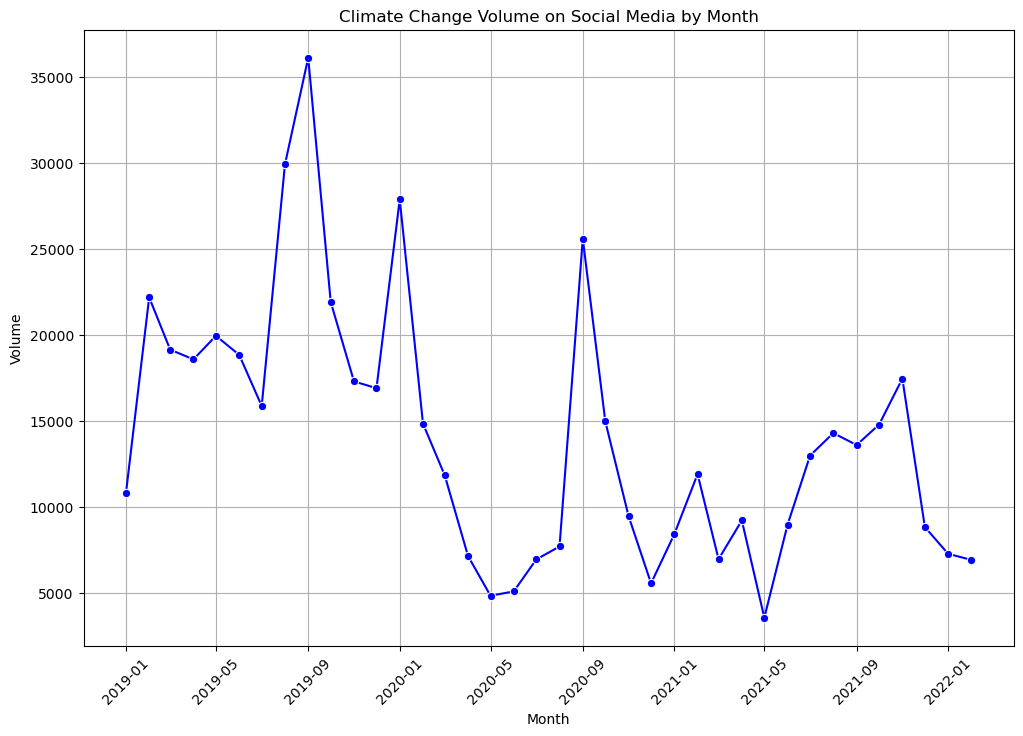

In [648]:
# Extract year and month from the 'date' column
climate_sm['YearMonth'] = climate_sm['date'].dt.to_period('M')

# Group by YearMonth and sum the volume
climate_sm_monthly = climate_sm.groupby('YearMonth')['climatechange_vol'].sum().reset_index()

# Convert YearMonth back to datetime for plotting
climate_sm_monthly['YearMonth'] = climate_sm_monthly['YearMonth'].dt.to_timestamp()

# Plot the data
plt.figure(figsize=(12, 8))
sns.lineplot(data=climate_sm_monthly, x='YearMonth', y='climatechange_vol', marker='o', color='blue')

plt.title('Climate Change Volume on Social Media by Month')
plt.xlabel('Month')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

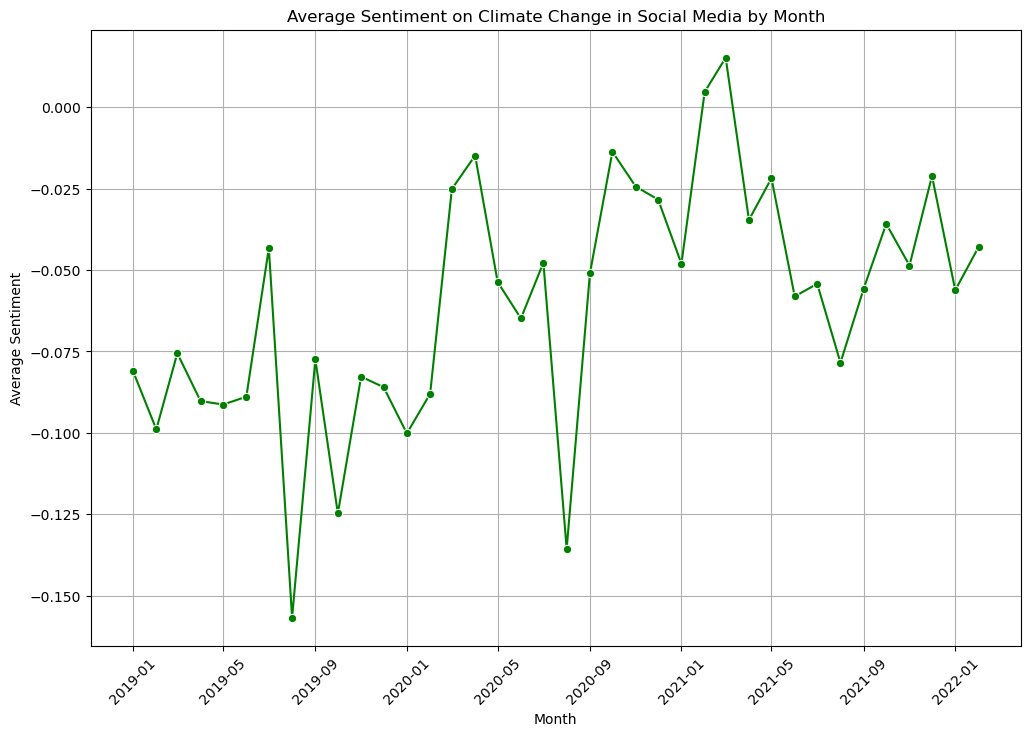

In [649]:
# Extract year and month from the 'date' column
social_media_df['YearMonth'] = social_media_df['date'].dt.to_period('M')

# Group by YearMonth and calculate the average sentiment
sentiment_by_month = social_media_df.groupby('YearMonth')['climatechange_vader_comp_avg'].mean().reset_index()

# Convert YearMonth back to datetime for plotting
sentiment_by_month['YearMonth'] = sentiment_by_month['YearMonth'].dt.to_timestamp()

# Plot the data
plt.figure(figsize=(12, 8))
sns.lineplot(data=sentiment_by_month, x='YearMonth', y='climatechange_vader_comp_avg', marker='o', color='green')

plt.title('Average Sentiment on Climate Change in Social Media by Month')
plt.xlabel('Month')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

/var/folders/5y/qk40s5mj3n330pjcftfym3180000gn/T/ipykernel_6448/1984621295.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climate_wp['YearMonth'] = climate_wp['Date'].dt.to_period('M')
/var/folders/5y/qk40s5mj3n330pjcftfym3180000gn/T/ipykernel_6448/1984621295.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climate_nyt['YearMonth'] = climate_nyt['Date'].dt.to_period('M')
/var/folders/5y/qk40s5mj3n330pjcftfym3180000gn/T/ipykernel_6448/1984621295.py:4: SettingWithCopyWarning: 
A value is trying to be 

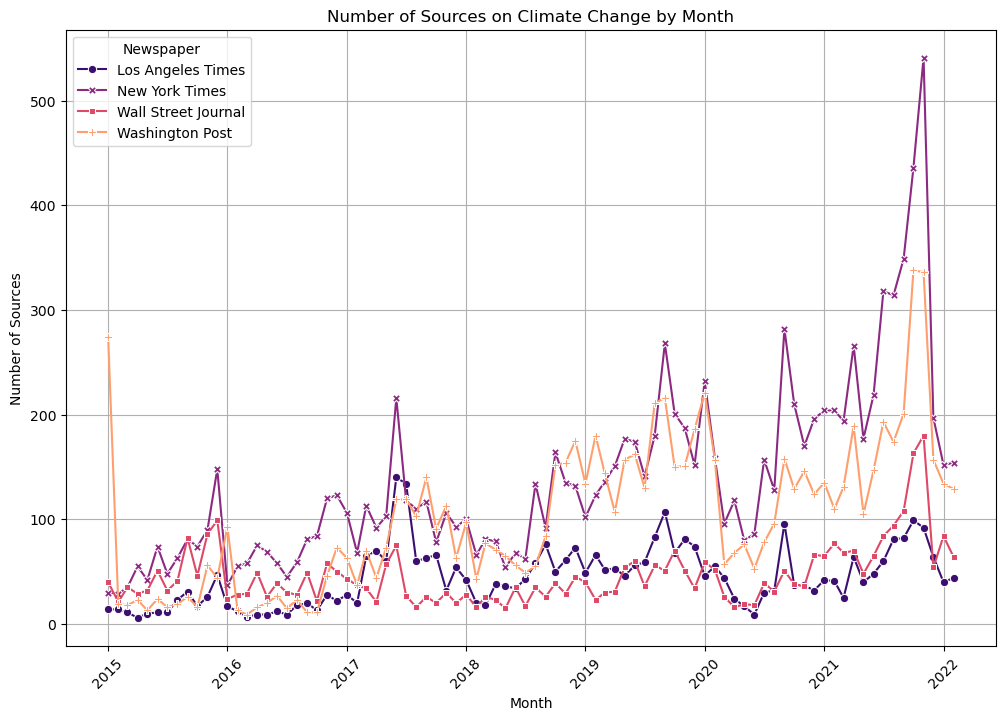

In [650]:
# Extract year and month from the 'Date' column for each newspaper DataFrame
climate_wp['YearMonth'] = climate_wp['Date'].dt.to_period('M')
climate_nyt['YearMonth'] = climate_nyt['Date'].dt.to_period('M')
climate_lat['YearMonth'] = climate_lat['Date'].dt.to_period('M')
climate_wsj['YearMonth'] = climate_wsj['Date'].dt.to_period('M')

# Add a label to each dataset
climate_wp['Newspaper'] = 'Washington Post'
climate_nyt['Newspaper'] = 'New York Times'
climate_lat['Newspaper'] = 'Los Angeles Times'
climate_wsj['Newspaper'] = 'Wall Street Journal'

# Combine all datasets into one
combined_data = pd.concat([climate_wp, climate_nyt, climate_lat, climate_wsj])

# Group by YearMonth and Newspaper to count the number of sources
sources_by_month = combined_data.groupby(['YearMonth', 'Newspaper']).size().reset_index(name='Count')

# Convert YearMonth back to datetime for plotting
sources_by_month['YearMonth'] = sources_by_month['YearMonth'].dt.to_timestamp()

# Plot the data
plt.figure(figsize=(12, 8))
sns.lineplot(data=sources_by_month, x='YearMonth', y='Count', hue='Newspaper', palette='magma', markers=True, style='Newspaper', dashes=False)

plt.title('Number of Sources on Climate Change by Month')
plt.xlabel('Month')
plt.ylabel('Number of Sources')
plt.xticks(rotation=45)
plt.legend(title='Newspaper')
plt.grid(True)
plt.show()

Correlation between social media sentiment and news coverage: -0.011424109029630362


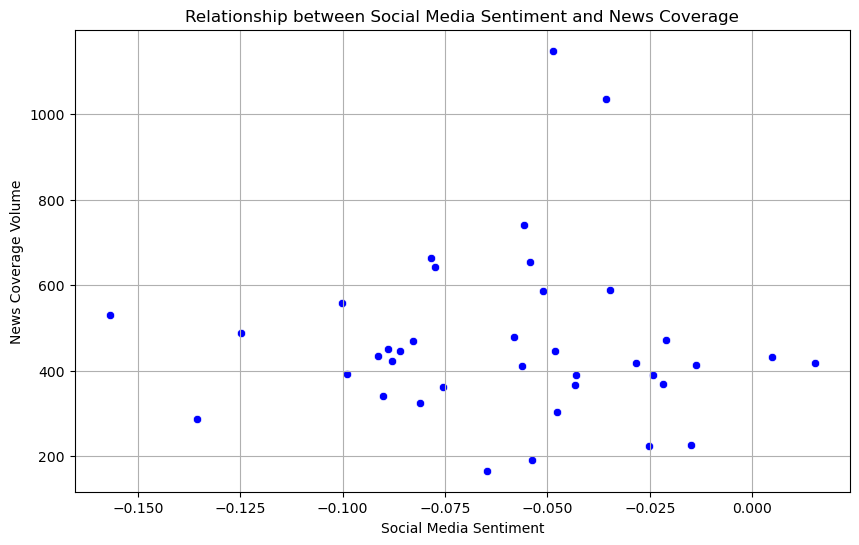

In [651]:
# Ensure the 'YearMonth' column is in datetime format for both datasets
sentiment_by_month['YearMonth'] = pd.to_datetime(sentiment_by_month['YearMonth'])
sources_by_month['YearMonth'] = pd.to_datetime(sources_by_month['YearMonth'])

# Filter news coverage data for the specific topic (e.g., Climate Change)
news_coverage = sources_by_month.groupby('YearMonth')['Count'].sum().reset_index()

# Group news coverage by month and sum the counts
news_coverage_monthly = news_coverage.groupby('YearMonth')['Count'].sum().reset_index()

# Merge social media sentiment data with news coverage data on 'YearMonth'
merged_data = pd.merge(sentiment_by_month, news_coverage_monthly, on='YearMonth', how='inner')

# Rename columns for clarity
merged_data.rename(columns={'climatechange_vader_comp_avg': 'Sentiment', 'Count': 'NewsCoverage'}, inplace=True)

# Calculate the correlation between sentiment and news coverage
correlation = merged_data['Sentiment'].corr(merged_data['NewsCoverage'])

print(f"Correlation between social media sentiment and news coverage: {correlation}")

# Plot the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='Sentiment', y='NewsCoverage', color='blue')
plt.title('Relationship between Social Media Sentiment and News Coverage')
plt.xlabel('Social Media Sentiment')
plt.ylabel('News Coverage Volume')
plt.grid(True)
plt.show()

/var/folders/5y/qk40s5mj3n330pjcftfym3180000gn/T/ipykernel_6448/3006784992.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climate_sm['SentimentDifference'] = climate_sm['climatechange_vader_pos_to_neg']
/var/folders/5y/qk40s5mj3n330pjcftfym3180000gn/T/ipykernel_6448/3006784992.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climate_sm['YearMonth'] = climate_sm['YearMonth'].dt.to_timestamp()


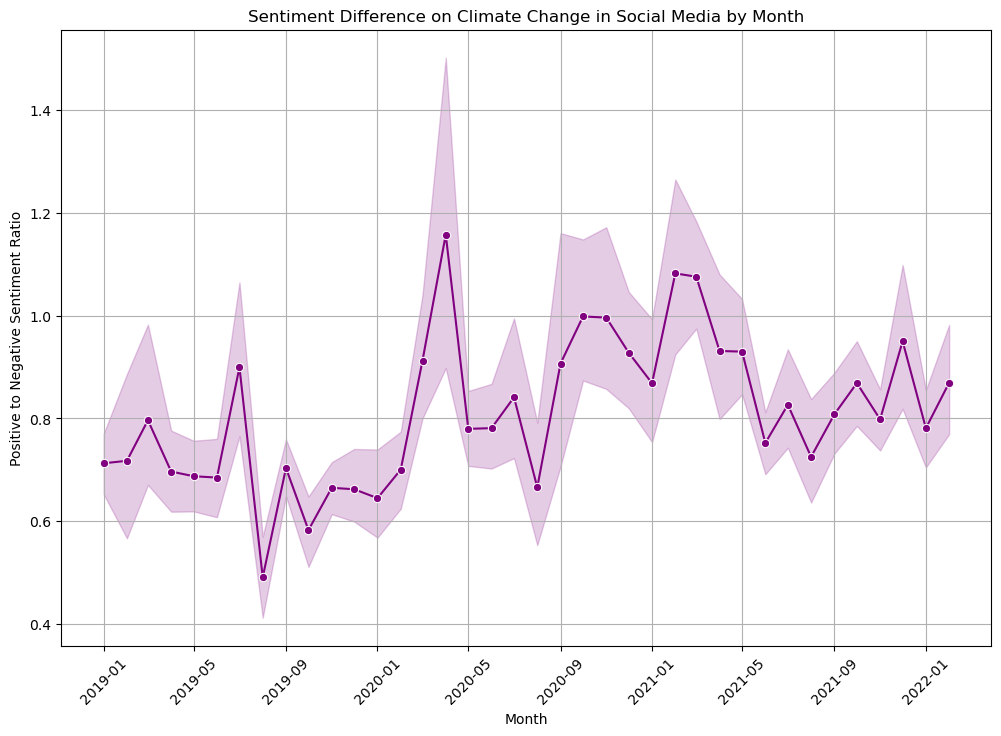

In [652]:
# Calculate the difference between positive and negative sentiment ratios
climate_sm['SentimentDifference'] = climate_sm['climatechange_vader_pos_to_neg']

# Convert 'YearMonth' to datetime for compatibility with plotting
climate_sm['YearMonth'] = climate_sm['YearMonth'].dt.to_timestamp()

# Plot the sentiment difference across time
plt.figure(figsize=(12, 8))
sns.lineplot(data=climate_sm, x='YearMonth', y='SentimentDifference', marker='o', color='purple')

plt.title('Sentiment Difference on Climate Change in Social Media by Month')
plt.xlabel('Month')
plt.ylabel('Positive to Negative Sentiment Ratio')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Correlation between sentiment difference and news reporting volume: -0.04310161565990301


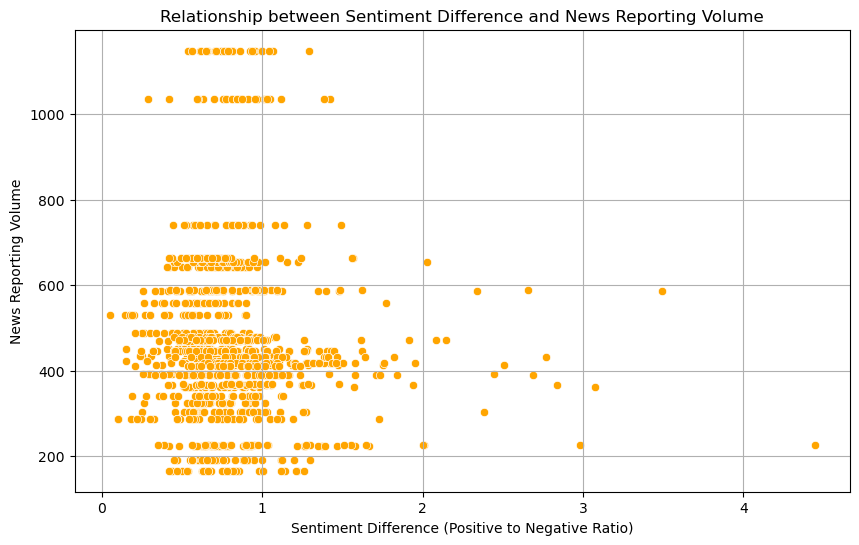

In [653]:
# Merge sentiment difference data with news coverage data on 'YearMonth'
sentiment_difference_data = climate_sm[['YearMonth', 'SentimentDifference']]
merged_relationship_data = pd.merge(sentiment_difference_data, news_coverage, on='YearMonth', how='inner')

# Rename columns for clarity
merged_relationship_data.rename(columns={'SentimentDifference': 'SentimentDiff', 'Count': 'NewsVolume'}, inplace=True)

# Calculate the correlation between sentiment difference and news volume
correlation_diff_volume = merged_relationship_data['SentimentDiff'].corr(merged_relationship_data['NewsVolume'])

print(f"Correlation between sentiment difference and news reporting volume: {correlation_diff_volume}")

# Plot the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_relationship_data, x='SentimentDiff', y='NewsVolume', color='orange')
plt.title('Relationship between Sentiment Difference and News Reporting Volume')
plt.xlabel('Sentiment Difference (Positive to Negative Ratio)')
plt.ylabel('News Reporting Volume')
plt.grid(True)
plt.show()

Correlation between daily climate social media volume and newspaper volume: 0.10644949351908815


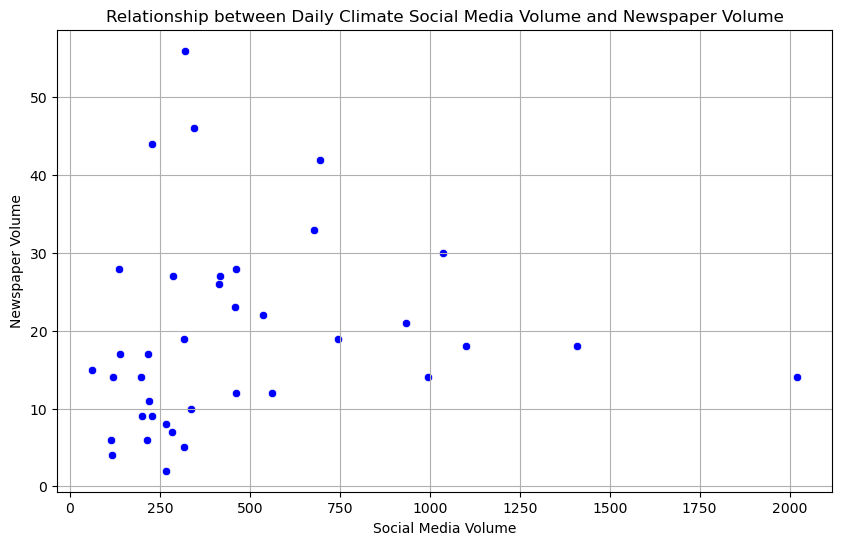

In [654]:
# Extract relevant columns for climate social media and newspaper reporting
climate_sm_daily = climate_sm[['date', 'climatechange_vol']]
climate_news_daily = sources_by_day[['Date', 'Count']]

# Merge the two datasets on the date
merged_climate_data_daily = pd.merge(climate_sm_daily, climate_news_daily, left_on='date', right_on='Date', how='inner')

# Rename columns for clarity
merged_climate_data_daily.rename(columns={'climatechange_vol': 'SocialMediaVolume', 'Count': 'NewspaperVolume'}, inplace=True)

# Calculate the correlation between social media volume and newspaper volume
correlation_daily = merged_climate_data_daily['SocialMediaVolume'].corr(merged_climate_data_daily['NewspaperVolume'])

print(f"Correlation between daily climate social media volume and newspaper volume: {correlation_daily}")

# Plot the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_climate_data_daily, x='SocialMediaVolume', y='NewspaperVolume', color='blue')
plt.title('Relationship between Daily Climate Social Media Volume and Newspaper Volume')
plt.xlabel('Social Media Volume')
plt.ylabel('Newspaper Volume')
plt.grid(True)
plt.show()

### Time-Lagged correlation Analysis
Monthly analysis

In [655]:
# Prepare climate change data for newspapers and social media
# Shift newspaper data by 1 month
sources_by_month['ShiftedCount'] = sources_by_month.groupby('Newspaper')['Count'].shift(1)

# Filter only climate change data for newspapers
climate_news_volume = sources_by_month.groupby('YearMonth')['ShiftedCount'].sum().reset_index()

# Prepare social media data
climate_sm_volume = climate_sm_monthly[['YearMonth', 'climatechange_vol']]

# Merge the two datasets on 'YearMonth'
merged_data = pd.merge(climate_sm_volume, climate_news_volume, on='YearMonth', how='inner')

Time-lagged correlation (1 month): 0.10341346350274012


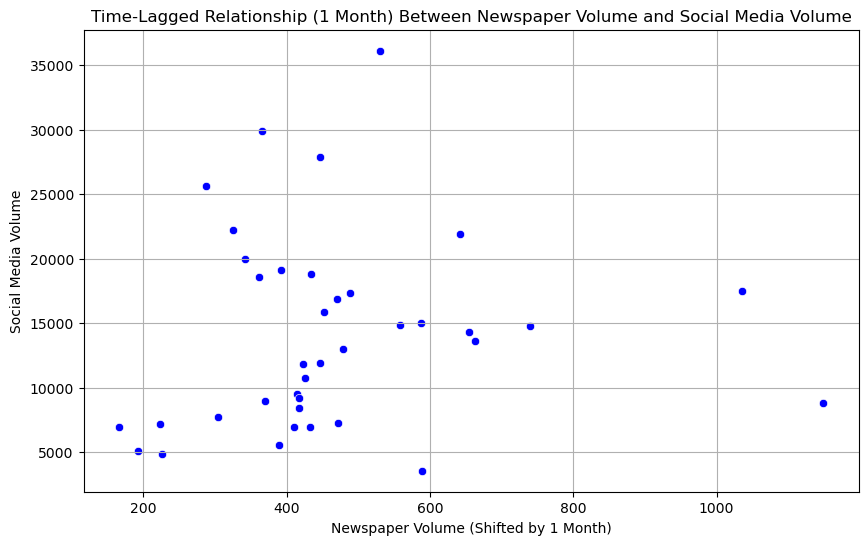

Time-lagged correlation (1 month(s)): 0.10341346350274012
Time-lagged correlation (2 month(s)): -0.05871388826673004
Time-lagged correlation (3 month(s)): -0.17107850510152384


In [656]:
# Calculate correlation for 1-month lag
correlation = merged_data['climatechange_vol'].corr(merged_data['ShiftedCount'])
print(f"Time-lagged correlation (1 month): {correlation}")

# Plot the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='ShiftedCount', y='climatechange_vol', color='blue')
plt.title('Time-Lagged Relationship (1 Month) Between Newspaper Volume and Social Media Volume')
plt.xlabel('Newspaper Volume (Shifted by 1 Month)')
plt.ylabel('Social Media Volume')
plt.grid(True)
plt.show()

# Analyze multiple time lags
for lag in range(1, 4):  # Test lags of 1, 2, and 3 months
    sources_by_month['ShiftedCount'] = sources_by_month.groupby('Newspaper')['Count'].shift(lag)
    climate_news_volume = sources_by_month.groupby('YearMonth')['ShiftedCount'].sum().reset_index()
    merged_data = pd.merge(climate_sm_volume, climate_news_volume, on='YearMonth', how='inner')
    correlation = merged_data['climatechange_vol'].corr(merged_data['ShiftedCount'])
    print(f"Time-lagged correlation ({lag} month(s)): {correlation}")

Daily Analysis

In [657]:
# Convert 'Date' columns to datetime format if not already done
sources_by_month['Date'] = pd.to_datetime(sources_by_month['YearMonth'])  # Assuming 'YearMonth' is the column
climate_sm['date'] = pd.to_datetime(climate_sm['date'])

# Group newspaper data by daily dates
sources_by_day = sources_by_month.groupby('Date')['Count'].sum().reset_index()

# Group social media data by daily dates
climate_sm_daily = climate_sm.groupby('date')['climatechange_vol'].sum().reset_index()

# Shift newspaper data by 1 day
sources_by_day['ShiftedCount'] = sources_by_day['Count'].shift(1)

# Merge the two datasets on daily dates
merged_daily_data = pd.merge(climate_sm_daily, sources_by_day, left_on='date', right_on='Date', how='inner')

/var/folders/5y/qk40s5mj3n330pjcftfym3180000gn/T/ipykernel_6448/2757599062.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climate_sm['date'] = pd.to_datetime(climate_sm['date'])


Time-lagged correlation (1 day): 0.3963445921013972


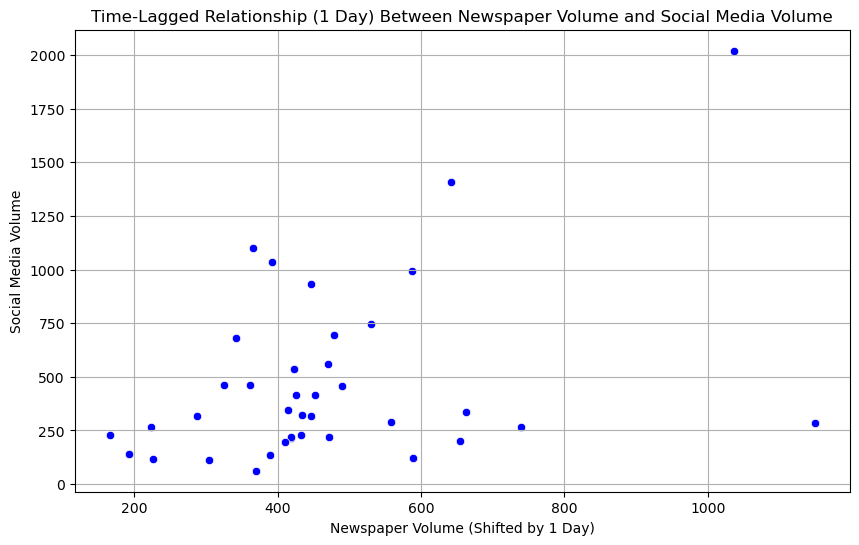

Time-lagged correlation (1 day(s)): 0.3963445921013972
Time-lagged correlation (2 day(s)): 0.10160836547798217
Time-lagged correlation (3 day(s)): 0.027770686081171513
Time-lagged correlation (4 day(s)): 0.022214601958141105
Time-lagged correlation (5 day(s)): -0.06706389947625079
Time-lagged correlation (6 day(s)): -0.23737676290629206
Time-lagged correlation (7 day(s)): -0.011688741724228421
Time-lagged correlation (8 day(s)): -0.12488032384429264
Time-lagged correlation (9 day(s)): -0.07004619206030514


In [658]:
# Calculate correlation for 1-day lag
correlation = merged_daily_data['climatechange_vol'].corr(merged_daily_data['ShiftedCount'])
print(f"Time-lagged correlation (1 day): {correlation}")

# Plot the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_daily_data, x='ShiftedCount', y='climatechange_vol', color='blue')
plt.title('Time-Lagged Relationship (1 Day) Between Newspaper Volume and Social Media Volume')
plt.xlabel('Newspaper Volume (Shifted by 1 Day)')
plt.ylabel('Social Media Volume')
plt.grid(True)
plt.show()

# Analyze multiple time lags
for lag in range(1, 10):  # Test lags of 1, 2, and 3 days
    sources_by_day['ShiftedCount'] = sources_by_day['Count'].shift(lag)
    merged_daily_data = pd.merge(climate_sm_daily, sources_by_day, left_on='date', right_on='Date', how='inner')
    correlation = merged_daily_data['climatechange_vol'].corr(merged_daily_data['ShiftedCount'])
    print(f"Time-lagged correlation ({lag} day(s)): {correlation}")

### Event Analysis

Columns in sentiment_by_month: Index(['YearMonth', 'climatechange_vader_comp_avg'], dtype='object')


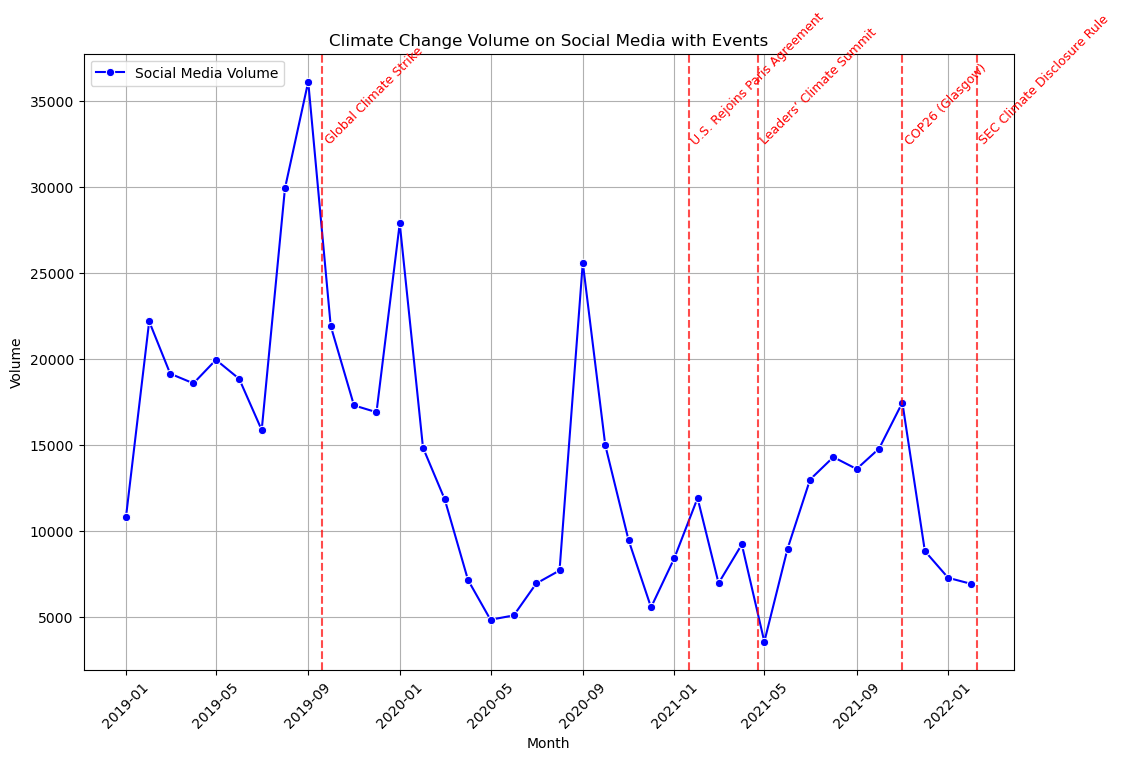

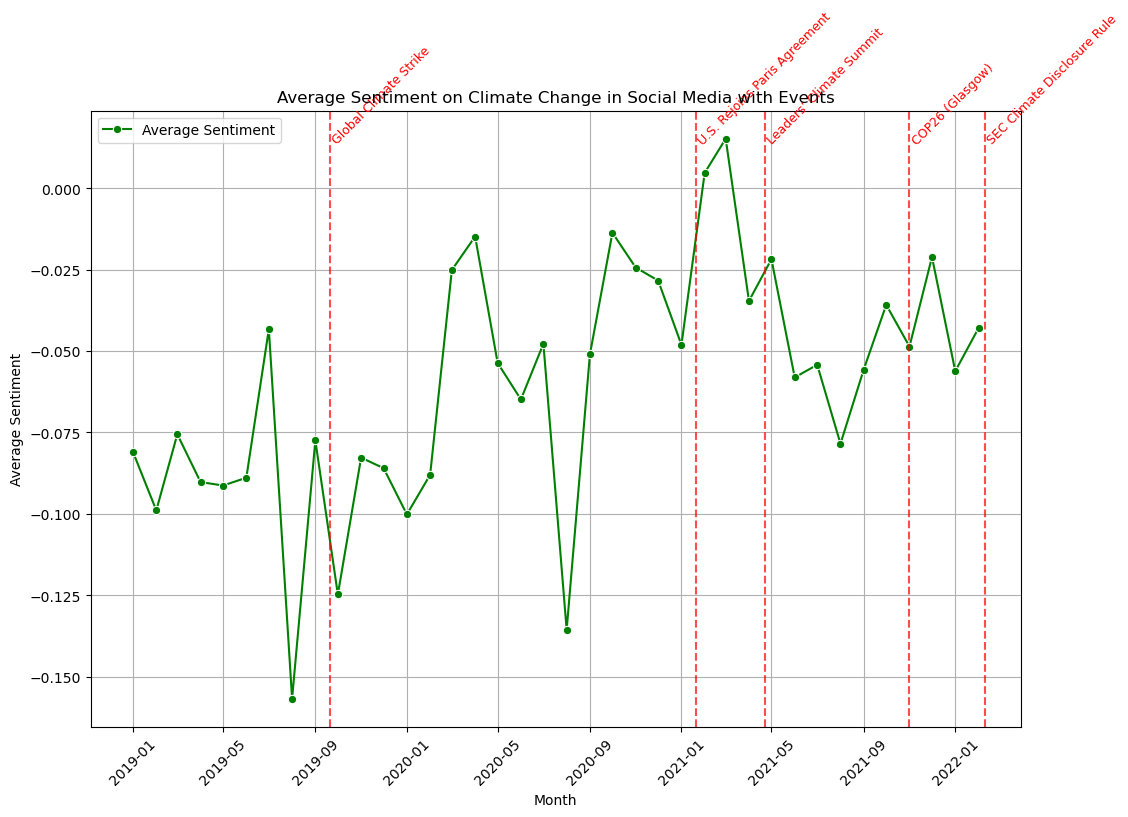

In [659]:
# Debugging: Print column names
print("Columns in sentiment_by_month:", sentiment_by_month.columns)

# Define climate change events
events = {
    "Global Climate Strike": "2019-09-20",
    "U.S. Rejoins Paris Agreement": "2021-01-20",
    "Leaders’ Climate Summit": "2021-04-22",
    "COP26 (Glasgow)": "2021-11-01",
    "SEC Climate Disclosure Rule": "2022-02-09"
}

# Convert event dates to datetime
events_df = pd.DataFrame(list(events.items()), columns=["Event", "Date"])
events_df["Date"] = pd.to_datetime(events_df["Date"])

# Plot Climate Change Volume on Social Media with Event Markers
plt.figure(figsize=(12, 8))
sns.lineplot(data=climate_sm_monthly, x='YearMonth', y='climatechange_vol', marker='o', color='blue', label='Social Media Volume')
for _, row in events_df.iterrows():
    plt.axvline(x=row['Date'], color='red', linestyle='--', alpha=0.7)
    plt.text(row['Date'], climate_sm_monthly['climatechange_vol'].max() * 0.9, row['Event'], rotation=45, color='red', fontsize=9)
plt.title('Climate Change Volume on Social Media with Events')
plt.xlabel('Month')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

# Replace 'climatechange_vader_comp_avg' with the correct column name
correct_column_name = 'climatechange_vader_comp_avg'  # Update this based on the debug output

# Plot Average Sentiment on Climate Change in Social Media with Event Markers
plt.figure(figsize=(12, 8))
sns.lineplot(data=sentiment_by_month, x='YearMonth', y=correct_column_name, marker='o', color='green', label='Average Sentiment')
for _, row in events_df.iterrows():
    plt.axvline(x=row['Date'], color='red', linestyle='--', alpha=0.7)
    plt.text(row['Date'], sentiment_by_month[correct_column_name].max() * 0.9, row['Event'], rotation=45, color='red', fontsize=9)
plt.title('Average Sentiment on Climate Change in Social Media with Events')
plt.xlabel('Month')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

                          Event       Date  AvgSentiment  SocialMediaVolume  \
0         Global Climate Strike 2019-09-20     -0.065125            23324.0   
1  U.S. Rejoins Paris Agreement 2021-01-20     -0.008615             4205.0   
2       Leaders’ Climate Summit 2021-04-22     -0.053553             5952.0   
3               COP26 (Glasgow) 2021-11-01     -0.014312            13835.0   
4   SEC Climate Disclosure Rule 2022-02-09     -0.038639             3432.0   

   NewsVolume  
0           0  
1           0  
2           0  
3        1149  
4           0  


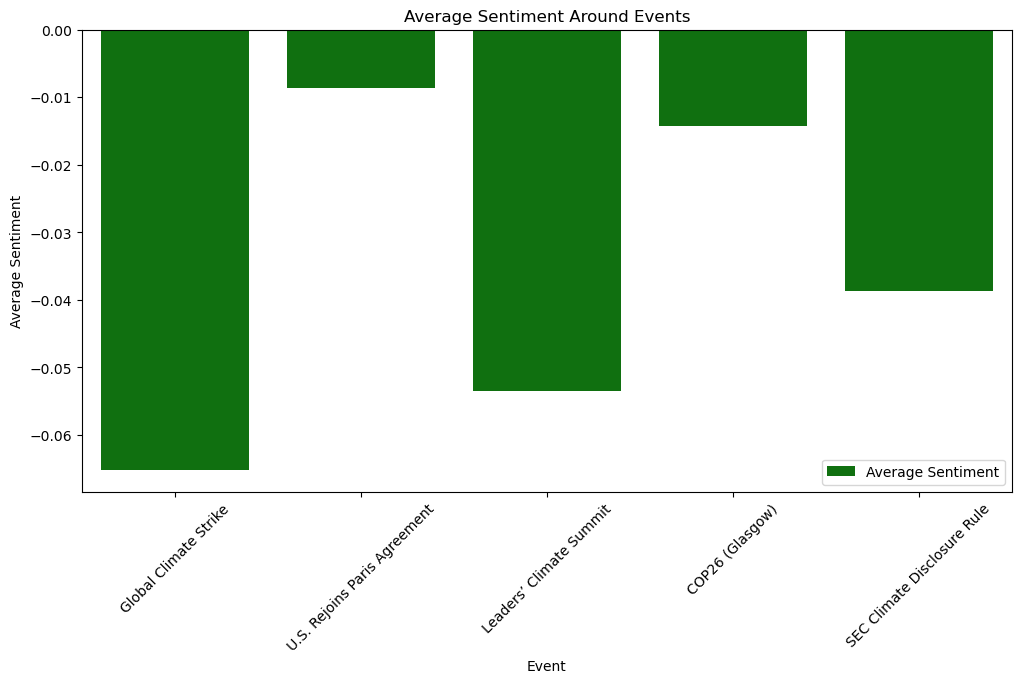

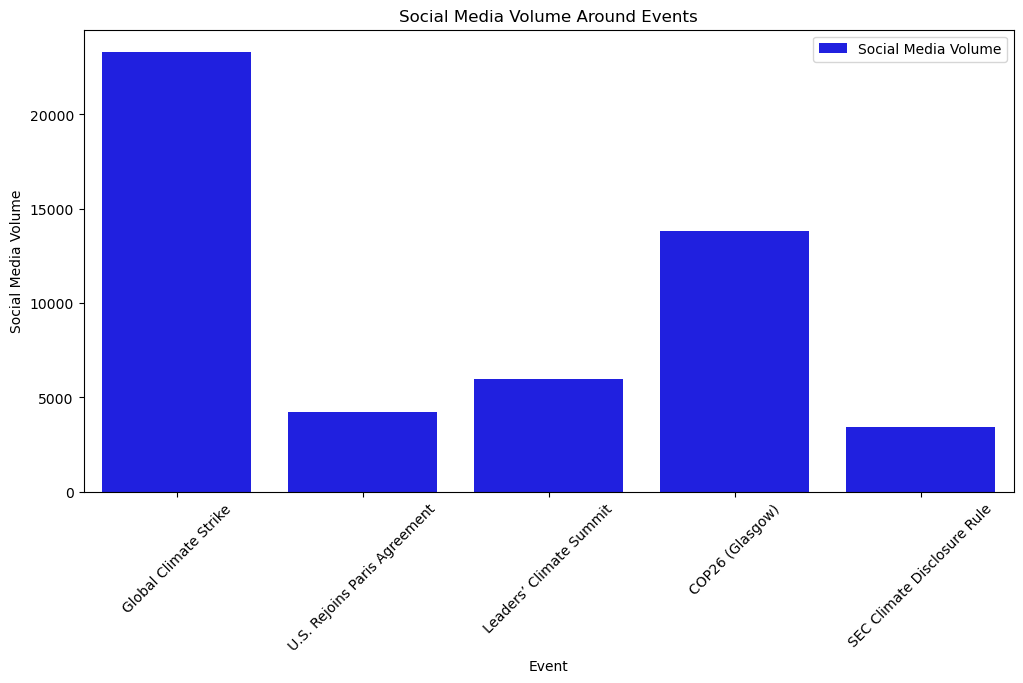

In [660]:
# Define climate change events
events = {
    "Global Climate Strike": "2019-09-20",
    "U.S. Rejoins Paris Agreement": "2021-01-20",
    "Leaders’ Climate Summit": "2021-04-22",
    "COP26 (Glasgow)": "2021-11-01",
    "SEC Climate Disclosure Rule": "2022-02-09"
}

# Convert event dates to datetime
events_df = pd.DataFrame(list(events.items()), columns=["Event", "Date"])
events_df["Date"] = pd.to_datetime(events_df["Date"])

# Initialize a list to store results
event_analysis_results = []

# Analyze changes in sentiment and reporting volume around each event
for _, row in events_df.iterrows():
    event_date = row["Date"]
    event_name = row["Event"]

    # Define a time window (e.g., 7 days before and after the event)
    start_date = event_date - pd.Timedelta(days=7)
    end_date = event_date + pd.Timedelta(days=7)

    # Filter social media data for the time window
    sm_filtered = climate_sm[(climate_sm['date'] >= start_date) & (climate_sm['date'] <= end_date)]

    # Filter newspaper data for the time window
    news_filtered = sources_by_month[(sources_by_month['YearMonth'] >= start_date) & (sources_by_month['YearMonth'] <= end_date)]

    # Calculate average sentiment and total volume for social media
    avg_sentiment = sm_filtered['climatechange_vader_comp_avg'].mean()
    total_sm_volume = sm_filtered['climatechange_vol'].sum()

    # Calculate total reporting volume for newspapers
    total_news_volume = news_filtered['Count'].sum()

    # Append results to the list
    event_analysis_results.append({
        "Event": event_name,
        "Date": event_date,
        "AvgSentiment": avg_sentiment,
        "SocialMediaVolume": total_sm_volume,
        "NewsVolume": total_news_volume
    })

# Convert results to a DataFrame
event_analysis_df = pd.DataFrame(event_analysis_results)

# Display the results
print(event_analysis_df)

# Plot changes in average sentiment around events
plt.figure(figsize=(12, 6))
sns.barplot(data=event_analysis_df, x="Event", y="AvgSentiment", color="green", label="Average Sentiment")
plt.ylabel("Average Sentiment")
plt.xticks(rotation=45)
plt.title("Average Sentiment Around Events")
plt.legend()
plt.show()

# Plot social media volume around events
plt.figure(figsize=(12, 6))
sns.barplot(data=event_analysis_df, x="Event", y="SocialMediaVolume", color="blue", label="Social Media Volume")
plt.ylabel("Social Media Volume")
plt.xticks(rotation=45)
plt.title("Social Media Volume Around Events")
plt.legend()
plt.show()


# Abortion

In [661]:
abortion_wp = all_wp[all_wp['Subject Terms'].str.contains('Abortion|Birth control', case=False, na=False)]
abortion_nyt = all_nyt[all_nyt['Subject Terms'].str.contains('Abortion|Birth control', case=False, na=False)]
abortion_lat = all_lat[all_lat['Subject Terms'].str.contains('Abortion|Birth control', case=False, na=False)]
abortion_wsj = all_wsj[all_wsj['Subject Terms'].str.contains('Abortion|Birth control', case=False, na=False)]

/var/folders/5y/qk40s5mj3n330pjcftfym3180000gn/T/ipykernel_6448/517863722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abortion_sm['YearMonth'] = abortion_sm['date'].dt.to_period('M')


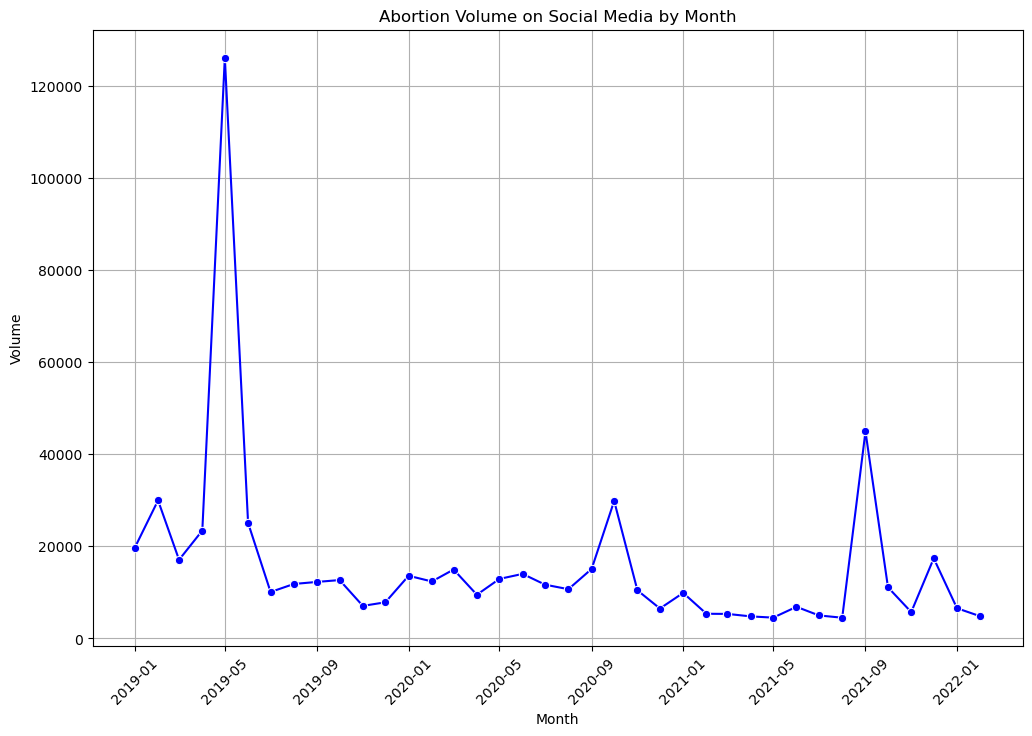

In [662]:
# Extract year and month from the 'date' column
abortion_sm['YearMonth'] = abortion_sm['date'].dt.to_period('M')

# Group by YearMonth and sum the volume
abortion_sm_monthly = abortion_sm.groupby('YearMonth')['abortion_vol'].sum().reset_index()

# Convert YearMonth back to datetime for plotting
abortion_sm_monthly['YearMonth'] = abortion_sm_monthly['YearMonth'].dt.to_timestamp()

# Plot the data
plt.figure(figsize=(12, 8))
sns.lineplot(data=abortion_sm_monthly, x='YearMonth', y='abortion_vol', marker='o', color='blue')

plt.title('Abortion Volume on Social Media by Month')
plt.xlabel('Month')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

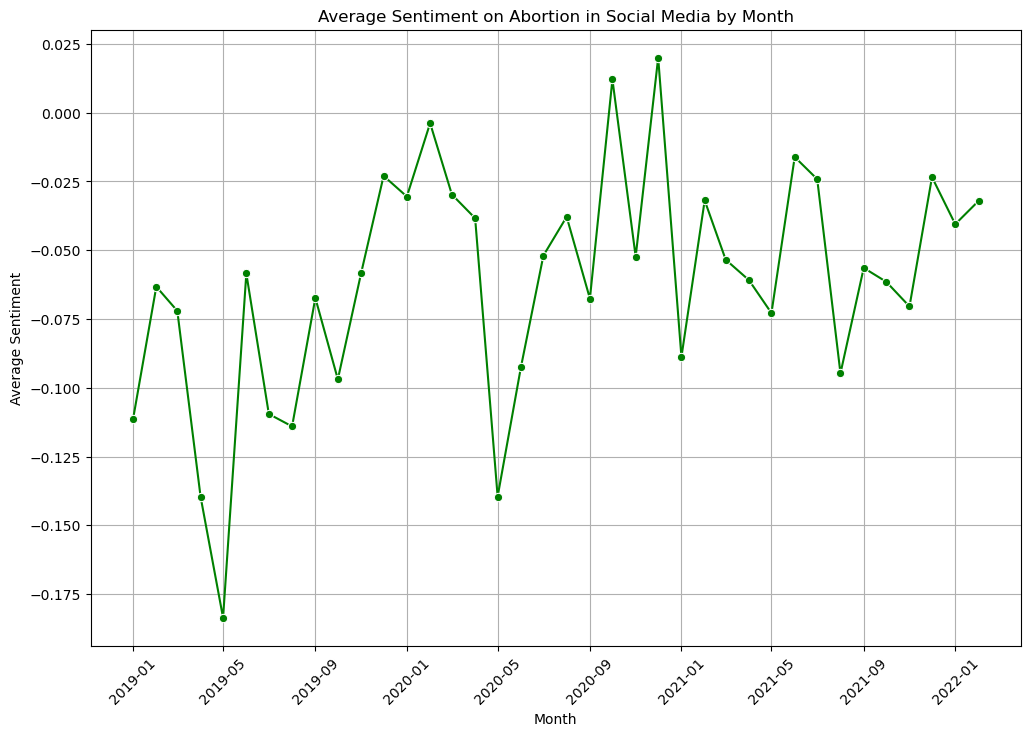

In [663]:
# Extract year and month from the 'date' column
social_media_df['YearMonth'] = social_media_df['date'].dt.to_period('M')

# Group by YearMonth and calculate the average sentiment for abortion
sentiment_by_month = social_media_df.groupby('YearMonth')['abortion_vader_comp_avg'].mean().reset_index()

# Convert YearMonth back to datetime for plotting
sentiment_by_month['YearMonth'] = sentiment_by_month['YearMonth'].dt.to_timestamp()

# Plot the data
plt.figure(figsize=(12, 8))
sns.lineplot(data=sentiment_by_month, x='YearMonth', y='abortion_vader_comp_avg', marker='o', color='green')

plt.title('Average Sentiment on Abortion in Social Media by Month')
plt.xlabel('Month')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

/var/folders/5y/qk40s5mj3n330pjcftfym3180000gn/T/ipykernel_6448/2319950548.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abortion_wp['YearMonth'] = abortion_wp['Date'].dt.to_period('M')
/var/folders/5y/qk40s5mj3n330pjcftfym3180000gn/T/ipykernel_6448/2319950548.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abortion_nyt['YearMonth'] = abortion_nyt['Date'].dt.to_period('M')
/var/folders/5y/qk40s5mj3n330pjcftfym3180000gn/T/ipykernel_6448/2319950548.py:4: SettingWithCopyWarning: 
A value is trying to

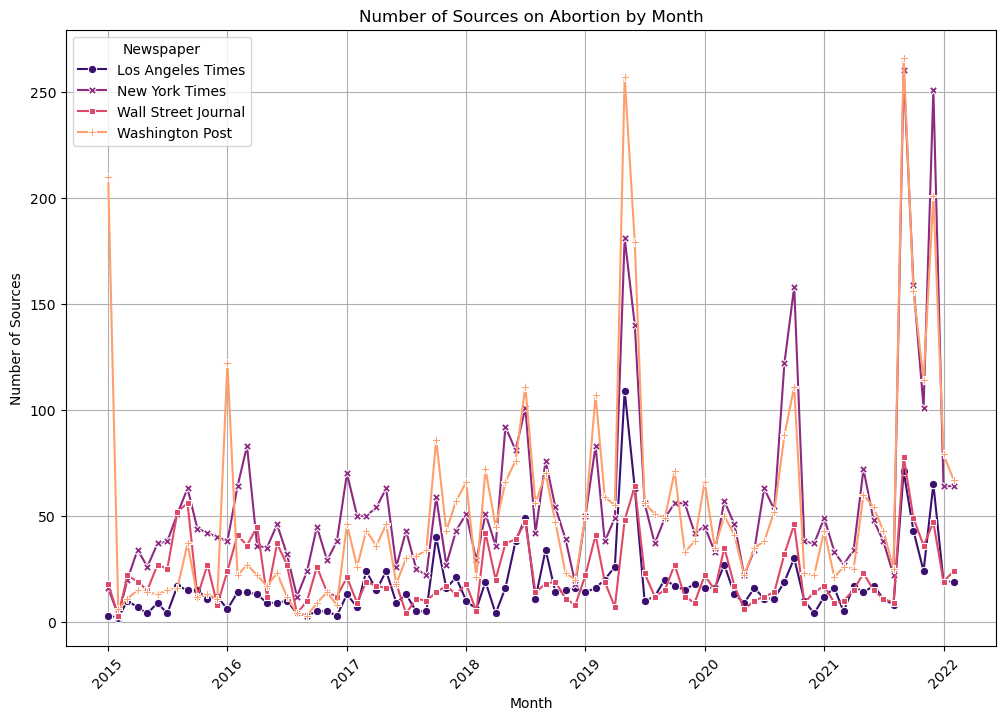

In [664]:
# Extract year and month from the 'Date' column for each newspaper DataFrame
abortion_wp['YearMonth'] = abortion_wp['Date'].dt.to_period('M')
abortion_nyt['YearMonth'] = abortion_nyt['Date'].dt.to_period('M')
abortion_lat['YearMonth'] = abortion_lat['Date'].dt.to_period('M')
abortion_wsj['YearMonth'] = abortion_wsj['Date'].dt.to_period('M')

# Add a label to each dataset
abortion_wp['Newspaper'] = 'Washington Post'
abortion_nyt['Newspaper'] = 'New York Times'
abortion_lat['Newspaper'] = 'Los Angeles Times'
abortion_wsj['Newspaper'] = 'Wall Street Journal'

# Combine all datasets into one
combined_data = pd.concat([abortion_wp, abortion_nyt, abortion_lat, abortion_wsj])

# Group by YearMonth and Newspaper to count the number of sources
sources_by_month = combined_data.groupby(['YearMonth', 'Newspaper']).size().reset_index(name='Count')

# Convert YearMonth back to datetime for plotting
sources_by_month['YearMonth'] = sources_by_month['YearMonth'].dt.to_timestamp()

# Plot the data
plt.figure(figsize=(12, 8))
sns.lineplot(data=sources_by_month, x='YearMonth', y='Count', hue='Newspaper', palette='magma', markers=True, style='Newspaper', dashes=False)

plt.title('Number of Sources on Abortion by Month')
plt.xlabel('Month')
plt.ylabel('Number of Sources')
plt.xticks(rotation=45)
plt.legend(title='Newspaper')
plt.grid(True)
plt.show()

Correlation between social media sentiment and news coverage: -0.09598933099773008


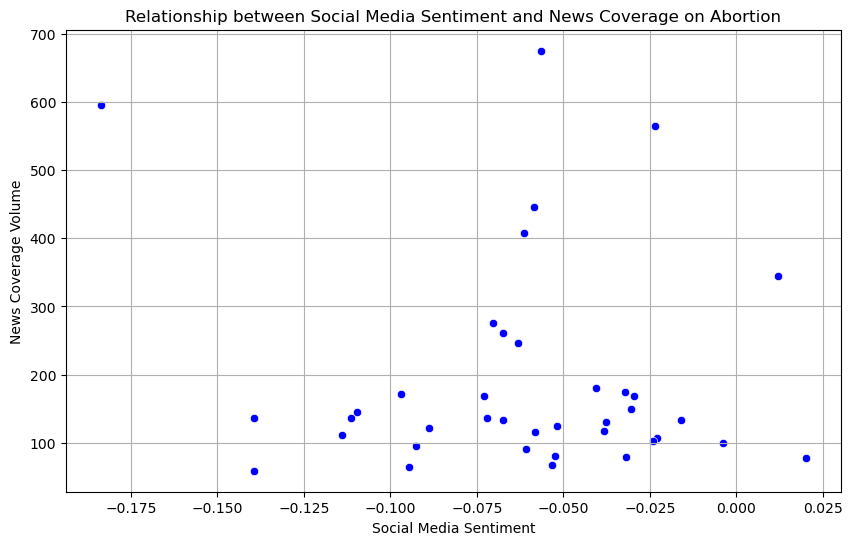

In [665]:
# Ensure the 'YearMonth' column is in datetime format for both datasets
sentiment_by_month['YearMonth'] = pd.to_datetime(sentiment_by_month['YearMonth'])
sources_by_month['YearMonth'] = pd.to_datetime(sources_by_month['YearMonth'])

# Filter news coverage data for the specific topic (e.g., Abortion)
news_coverage = sources_by_month.groupby('YearMonth')['Count'].sum().reset_index()

# Group news coverage by month and sum the counts
news_coverage_monthly = news_coverage.groupby('YearMonth')['Count'].sum().reset_index()

# Merge social media sentiment data with news coverage data on 'YearMonth'
merged_data = pd.merge(sentiment_by_month, news_coverage_monthly, on='YearMonth', how='inner')

# Rename columns for clarity
merged_data.rename(columns={'abortion_vader_comp_avg': 'Sentiment', 'Count': 'NewsCoverage'}, inplace=True)

# Calculate the correlation between sentiment and news coverage
correlation = merged_data['Sentiment'].corr(merged_data['NewsCoverage'])

print(f"Correlation between social media sentiment and news coverage: {correlation}")

# Plot the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='Sentiment', y='NewsCoverage', color='blue')
plt.title('Relationship between Social Media Sentiment and News Coverage on Abortion')
plt.xlabel('Social Media Sentiment')
plt.ylabel('News Coverage Volume')
plt.grid(True)
plt.show()

/var/folders/5y/qk40s5mj3n330pjcftfym3180000gn/T/ipykernel_6448/1542596445.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abortion_sm['SentimentDifference'] = abortion_sm['abortion_vader_pos_to_neg']
/var/folders/5y/qk40s5mj3n330pjcftfym3180000gn/T/ipykernel_6448/1542596445.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abortion_sm['YearMonth'] = abortion_sm['YearMonth'].dt.to_timestamp()


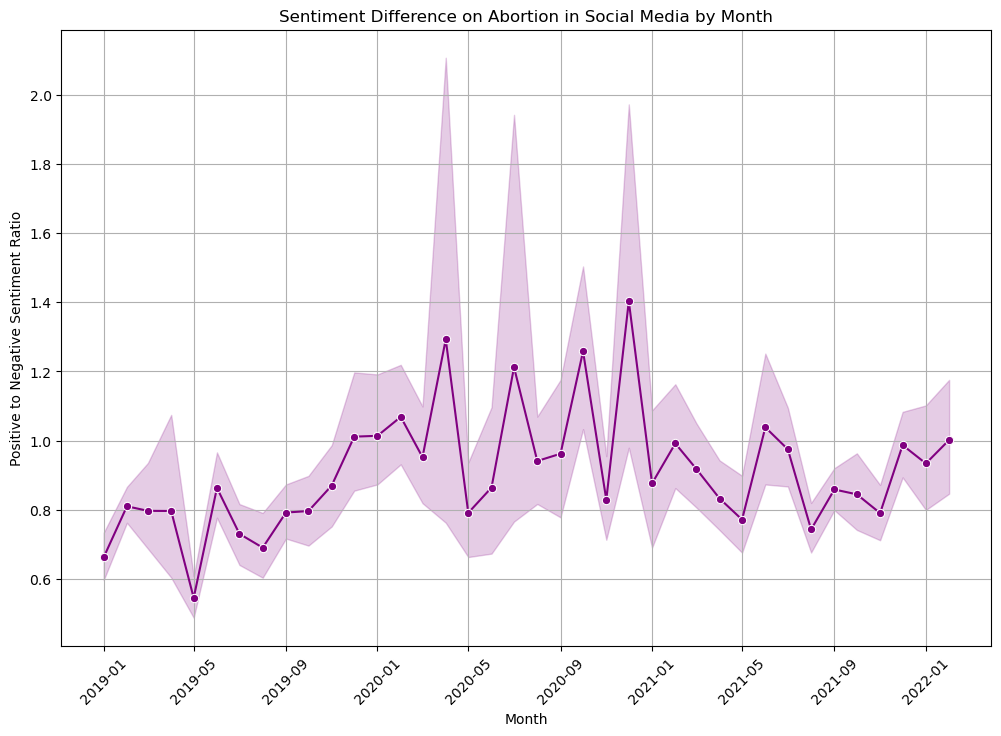

In [666]:
# Calculate the difference between positive and negative sentiment ratios
abortion_sm['SentimentDifference'] = abortion_sm['abortion_vader_pos_to_neg']

# Convert 'YearMonth' to datetime for compatibility with plotting
abortion_sm['YearMonth'] = abortion_sm['YearMonth'].dt.to_timestamp()

# Plot the sentiment difference across time
plt.figure(figsize=(12, 8))
sns.lineplot(data=abortion_sm, x='YearMonth', y='SentimentDifference', marker='o', color='purple')

plt.title('Sentiment Difference on Abortion in Social Media by Month')
plt.xlabel('Month')
plt.ylabel('Positive to Negative Sentiment Ratio')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Correlation between sentiment difference and news reporting volume on abortion: -0.043977104779356055


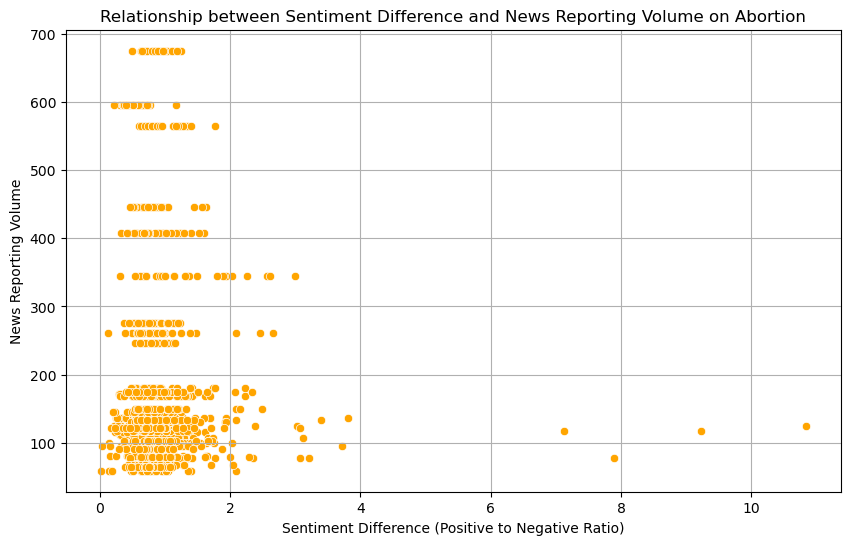

In [667]:
# Merge sentiment difference data with news coverage data on 'YearMonth'
sentiment_difference_data = abortion_sm[['YearMonth', 'SentimentDifference']]
merged_relationship_data = pd.merge(sentiment_difference_data, news_coverage, on='YearMonth', how='inner')

# Rename columns for clarity
merged_relationship_data.rename(columns={'SentimentDifference': 'SentimentDiff', 'Count': 'NewsVolume'}, inplace=True)

# Calculate the correlation between sentiment difference and news volume
correlation_diff_volume = merged_relationship_data['SentimentDiff'].corr(merged_relationship_data['NewsVolume'])

print(f"Correlation between sentiment difference and news reporting volume on abortion: {correlation_diff_volume}")

# Plot the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_relationship_data, x='SentimentDiff', y='NewsVolume', color='orange')
plt.title('Relationship between Sentiment Difference and News Reporting Volume on Abortion')
plt.xlabel('Sentiment Difference (Positive to Negative Ratio)')
plt.ylabel('News Reporting Volume')
plt.grid(True)
plt.show()

Correlation between daily abortion social media volume and newspaper volume: 0.14970661972854982


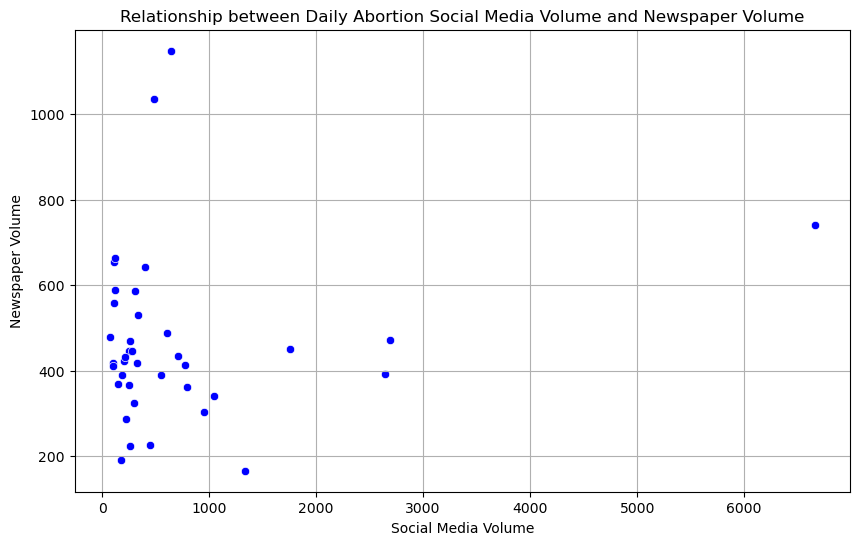

In [668]:
# Extract relevant columns for abortion social media and newspaper reporting
abortion_sm_daily = abortion_sm[['date', 'abortion_vol']]
abortion_news_daily = sources_by_day[['Date', 'Count']]

# Merge the two datasets on the date
merged_abortion_data_daily = pd.merge(abortion_sm_daily, abortion_news_daily, left_on='date', right_on='Date', how='inner')

# Rename columns for clarity
merged_abortion_data_daily.rename(columns={'abortion_vol': 'SocialMediaVolume', 'Count': 'NewspaperVolume'}, inplace=True)

# Calculate the correlation between social media volume and newspaper volume
correlation_daily = merged_abortion_data_daily['SocialMediaVolume'].corr(merged_abortion_data_daily['NewspaperVolume'])

print(f"Correlation between daily abortion social media volume and newspaper volume: {correlation_daily}")

# Plot the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_abortion_data_daily, x='SocialMediaVolume', y='NewspaperVolume', color='blue')
plt.title('Relationship between Daily Abortion Social Media Volume and Newspaper Volume')
plt.xlabel('Social Media Volume')
plt.ylabel('Newspaper Volume')
plt.grid(True)
plt.show()

#### Time-Lagged correlation Analysis
Monthly analysis

In [669]:
# Prepare abortion data for newspapers and social media
# Shift newspaper data by 1 month
sources_by_month['ShiftedCount'] = sources_by_month.groupby('Newspaper')['Count'].shift(1)

# Filter only abortion data for newspapers
abortion_news_volume = sources_by_month.groupby('YearMonth')['ShiftedCount'].sum().reset_index()

# Prepare social media data
abortion_sm_volume = abortion_sm_monthly[['YearMonth', 'abortion_vol']]

# Merge the two datasets on 'YearMonth'
merged_data = pd.merge(abortion_sm_volume, abortion_news_volume, on='YearMonth', how='inner')

Time-lagged correlation (1 month): -0.046631384840477234


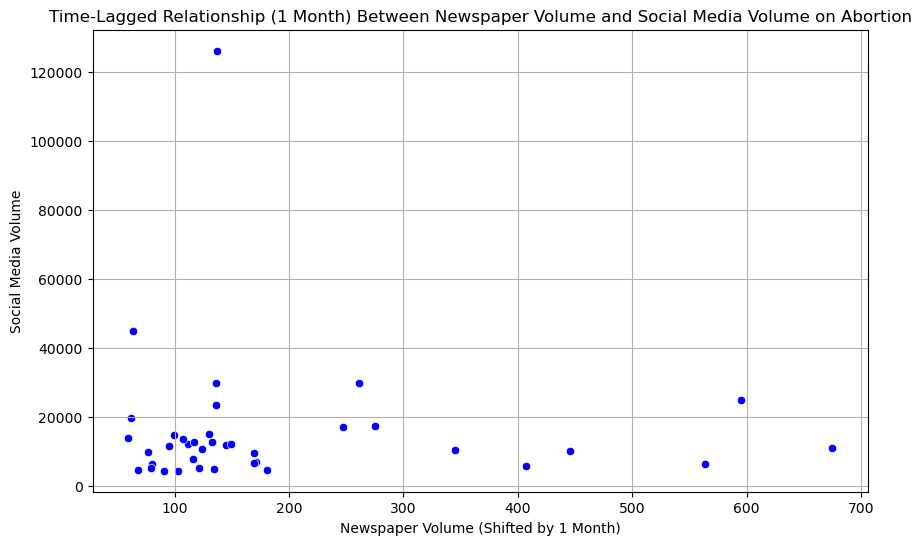

Time-lagged correlation (1 month(s)): -0.046631384840477234
Time-lagged correlation (2 month(s)): -0.1322583314537537
Time-lagged correlation (3 month(s)): 0.06592608923419611


In [670]:
# Calculate correlation for 1-month lag
correlation = merged_data['abortion_vol'].corr(merged_data['ShiftedCount'])
print(f"Time-lagged correlation (1 month): {correlation}")

# Plot the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='ShiftedCount', y='abortion_vol', color='blue')
plt.title('Time-Lagged Relationship (1 Month) Between Newspaper Volume and Social Media Volume on Abortion')
plt.xlabel('Newspaper Volume (Shifted by 1 Month)')
plt.ylabel('Social Media Volume')
plt.grid(True)
plt.show()

# Analyze multiple time lags
for lag in range(1, 4):  # Test lags of 1, 2, and 3 months
    sources_by_month['ShiftedCount'] = sources_by_month.groupby('Newspaper')['Count'].shift(lag)
    abortion_news_volume = sources_by_month.groupby('YearMonth')['ShiftedCount'].sum().reset_index()
    merged_data = pd.merge(abortion_sm_monthly, abortion_news_volume, on='YearMonth', how='inner')
    correlation = merged_data['abortion_vol'].corr(merged_data['ShiftedCount'])
    print(f"Time-lagged correlation ({lag} month(s)): {correlation}")

Daily Analysis

In [671]:
# Convert 'Date' columns to datetime format if not already done
sources_by_month['Date'] = pd.to_datetime(sources_by_month['YearMonth'])  # Assuming 'YearMonth' is the column
abortion_sm['date'] = pd.to_datetime(abortion_sm['date'])

# Group newspaper data by daily dates
sources_by_day = sources_by_month.groupby('Date')['Count'].sum().reset_index()

# Group social media data by daily dates
abortion_sm_daily = abortion_sm.groupby('date')['abortion_vol'].sum().reset_index()

# Shift newspaper data by 1 day
sources_by_day['ShiftedCount'] = sources_by_day['Count'].shift(1)

# Merge the two datasets on daily dates
merged_daily_data = pd.merge(abortion_sm_daily, sources_by_day, left_on='date', right_on='Date', how='inner')

/var/folders/5y/qk40s5mj3n330pjcftfym3180000gn/T/ipykernel_6448/3610200306.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abortion_sm['date'] = pd.to_datetime(abortion_sm['date'])


Time-lagged correlation (1 day): -0.013598665643670252


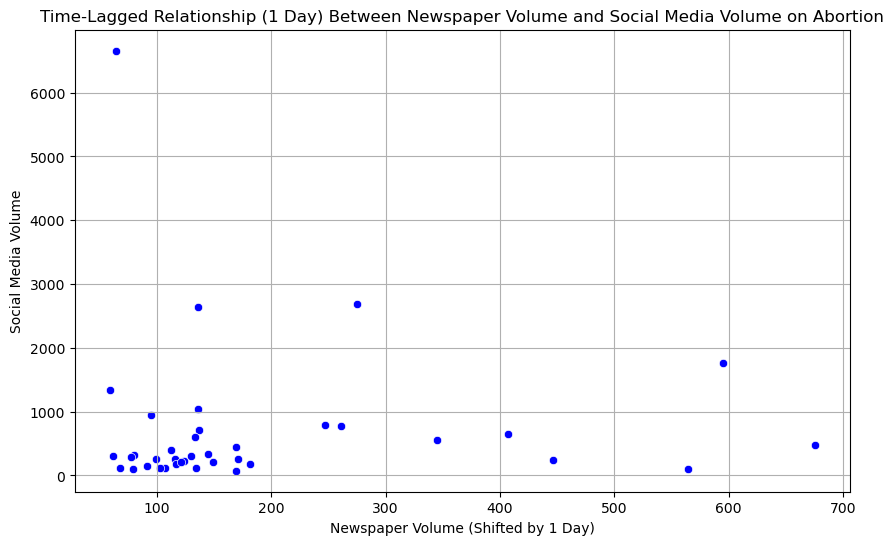

Time-lagged correlation (1 day(s)): -0.013598665643670252
Time-lagged correlation (2 day(s)): -0.05410351320641799
Time-lagged correlation (3 day(s)): 0.09432358313823505
Time-lagged correlation (4 day(s)): -0.07817829084654601
Time-lagged correlation (5 day(s)): -0.12405940513476436
Time-lagged correlation (6 day(s)): -0.201847338579742
Time-lagged correlation (7 day(s)): -0.0939383741122388
Time-lagged correlation (8 day(s)): -0.09481333283546878
Time-lagged correlation (9 day(s)): -0.13010654294594612


In [672]:
# Calculate correlation for 1-day lag
correlation = merged_daily_data['abortion_vol'].corr(merged_daily_data['ShiftedCount'])
print(f"Time-lagged correlation (1 day): {correlation}")

# Plot the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_daily_data, x='ShiftedCount', y='abortion_vol', color='blue')
plt.title('Time-Lagged Relationship (1 Day) Between Newspaper Volume and Social Media Volume on Abortion')
plt.xlabel('Newspaper Volume (Shifted by 1 Day)')
plt.ylabel('Social Media Volume')
plt.grid(True)
plt.show()

# Analyze multiple time lags
for lag in range(1, 10):  # Test lags of 1, 2, and 3 days
    sources_by_day['ShiftedCount'] = sources_by_day['Count'].shift(lag)
    merged_daily_data = pd.merge(abortion_sm_daily, sources_by_day, left_on='date', right_on='Date', how='inner')
    correlation = merged_daily_data['abortion_vol'].corr(merged_daily_data['ShiftedCount'])
    print(f"Time-lagged correlation ({lag} day(s)): {correlation}")

## Event Analysis

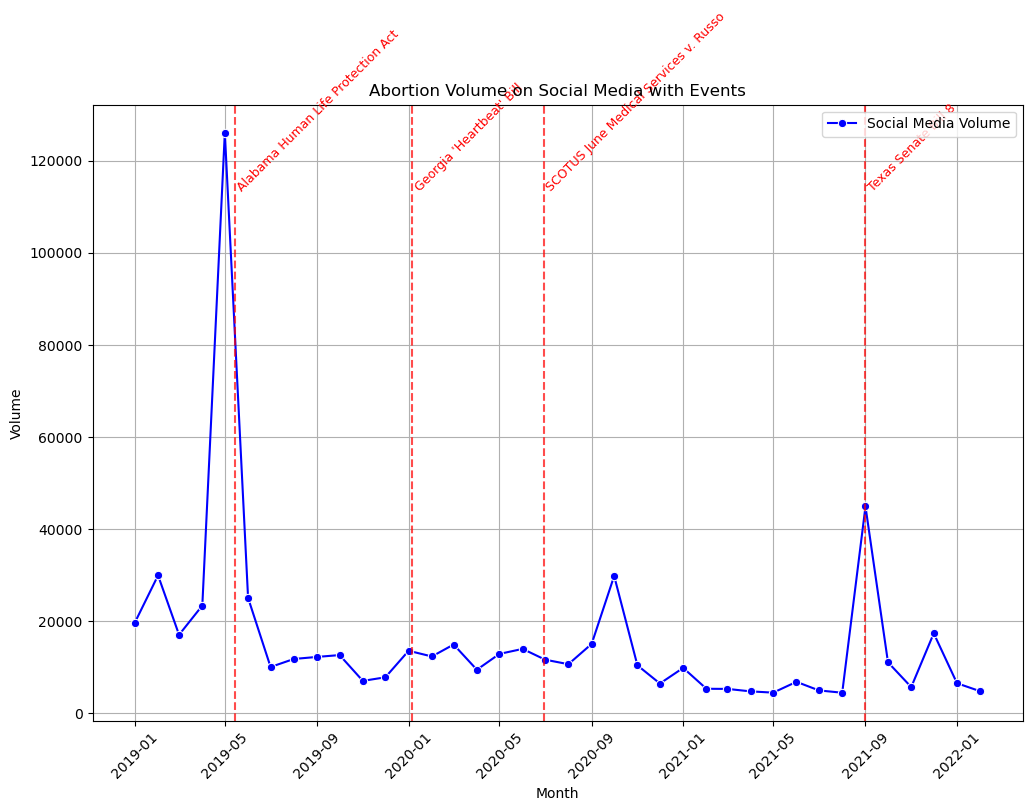

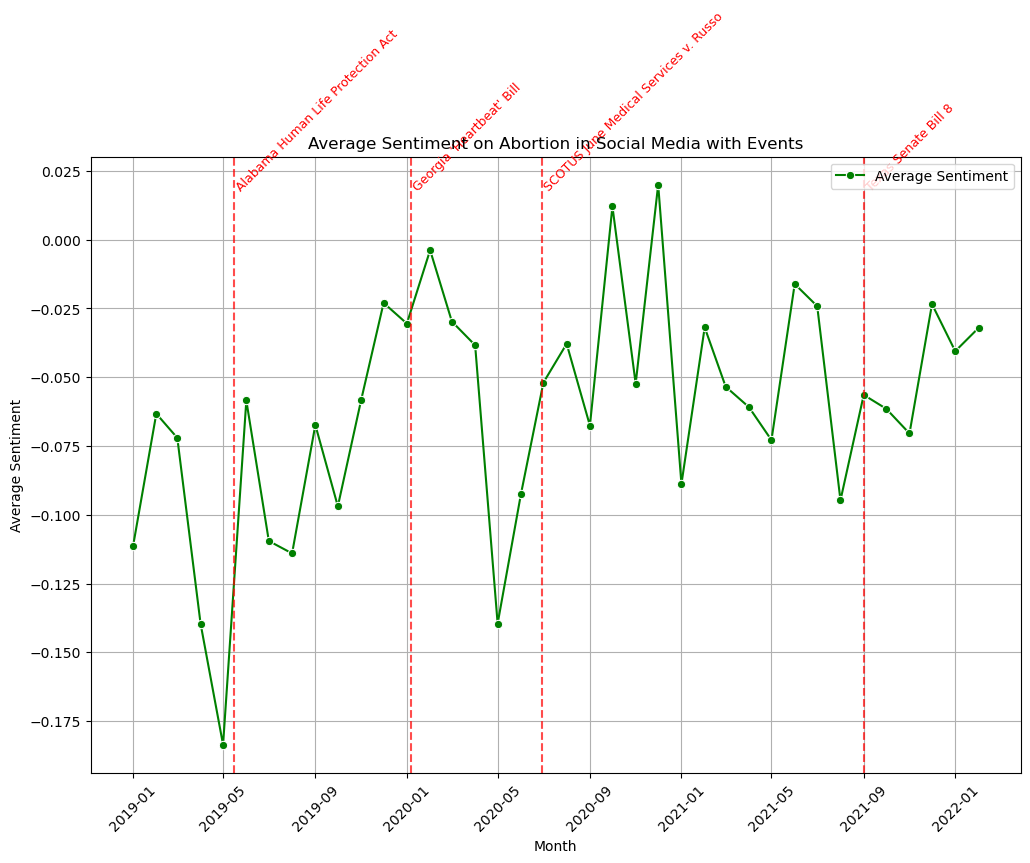

                                   Event       Date  AvgSentiment  \
0      Alabama Human Life Protection Act 2019-05-15     -0.198158   
1               Georgia 'Heartbeat' Bill 2020-01-06     -0.041388   
2  SCOTUS June Medical Services v. Russo 2020-06-29     -0.065445   
3                    Texas Senate Bill 8 2021-09-01     -0.076062   

   SocialMediaVolume  
0           104890.0  
1             3996.0  
2             8110.0  
3            34604.0  


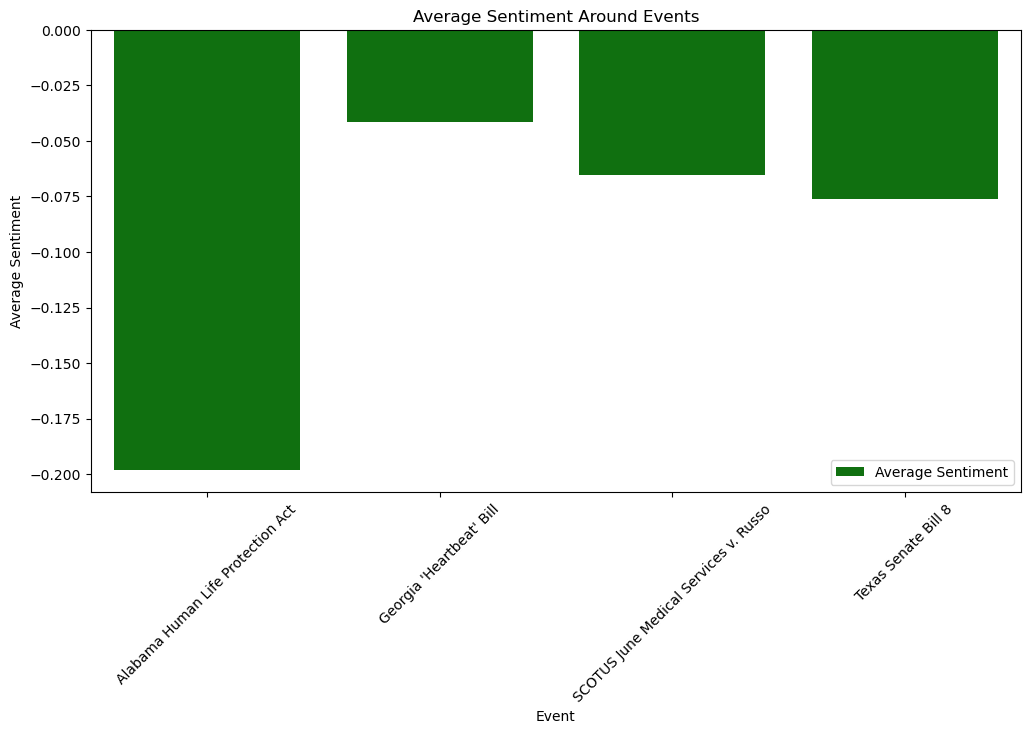

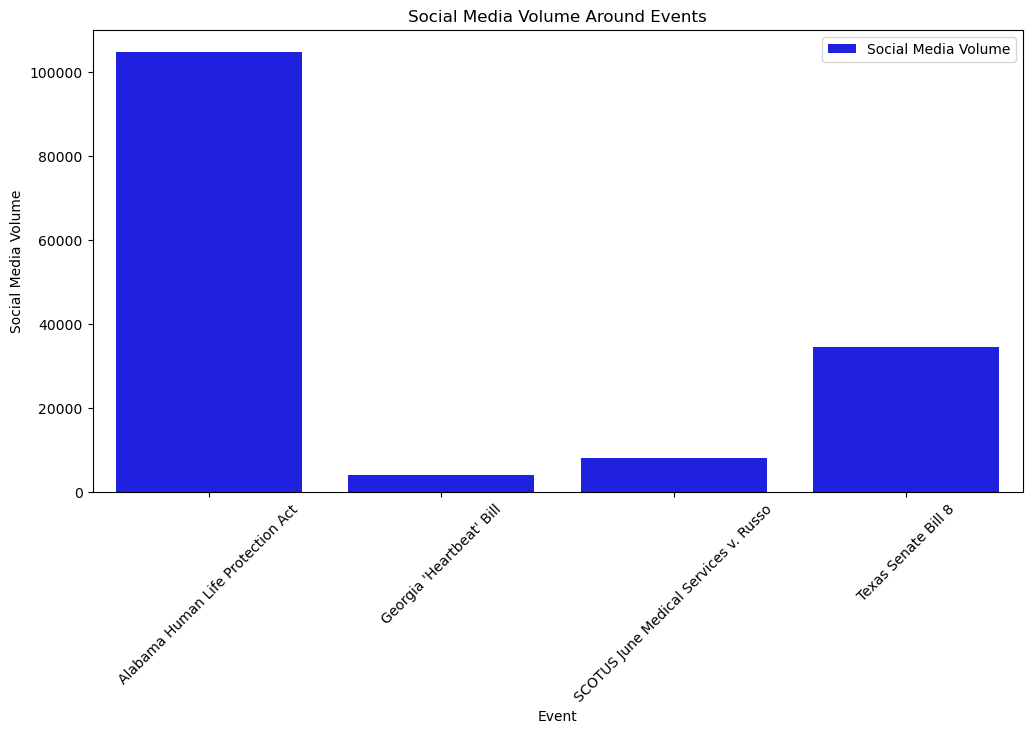

In [673]:
# Define abortion-related events
events = {
    "Alabama Human Life Protection Act": "2019-05-15",
    "Georgia 'Heartbeat' Bill": "2020-01-06",
    "SCOTUS June Medical Services v. Russo": "2020-06-29",
    "Texas Senate Bill 8": "2021-09-01"
}

# Convert event dates to datetime
events_df = pd.DataFrame(list(events.items()), columns=["Event", "Date"])
events_df["Date"] = pd.to_datetime(events_df["Date"])

# Plot Abortion Volume on Social Media with Event Markers
plt.figure(figsize=(12, 8))
sns.lineplot(data=abortion_sm_monthly, x='YearMonth', y='abortion_vol', marker='o', color='blue', label='Social Media Volume')
for _, row in events_df.iterrows():
    plt.axvline(x=row['Date'], color='red', linestyle='--', alpha=0.7)
    plt.text(row['Date'], abortion_sm_monthly['abortion_vol'].max() * 0.9, row['Event'], rotation=45, color='red', fontsize=9)
plt.title('Abortion Volume on Social Media with Events')
plt.xlabel('Month')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

# Plot Average Sentiment on Abortion in Social Media with Event Markers
plt.figure(figsize=(12, 8))
sns.lineplot(data=sentiment_by_month, x='YearMonth', y='abortion_vader_comp_avg', marker='o', color='green', label='Average Sentiment')
for _, row in events_df.iterrows():
    plt.axvline(x=row['Date'], color='red', linestyle='--', alpha=0.7)
    plt.text(row['Date'], sentiment_by_month['abortion_vader_comp_avg'].max() * 0.9, row['Event'], rotation=45, color='red', fontsize=9)
plt.title('Average Sentiment on Abortion in Social Media with Events')
plt.xlabel('Month')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

# Analyze changes in social media volume and sentiment around each event
event_analysis_results = []

for _, row in events_df.iterrows():
    event_date = row["Date"]
    event_name = row["Event"]

    # Define a time window (7 days before and after the event)
    start_date = event_date - pd.Timedelta(days=7)
    end_date = event_date + pd.Timedelta(days=7)

    # Filter social media data for the time window
    sm_filtered = abortion_sm[(abortion_sm['date'] >= start_date) & (abortion_sm['date'] <= end_date)]

    # Calculate average sentiment and total volume for social media
    avg_sentiment = sm_filtered['abortion_vader_comp_avg'].mean()
    total_sm_volume = sm_filtered['abortion_vol'].sum()

    # Append results to the list
    event_analysis_results.append({
        "Event": event_name,
        "Date": event_date,
        "AvgSentiment": avg_sentiment,
        "SocialMediaVolume": total_sm_volume
    })

# Convert results to a DataFrame
event_analysis_df = pd.DataFrame(event_analysis_results)

# Display the results
print(event_analysis_df)

# Plot changes in average sentiment around events
plt.figure(figsize=(12, 6))
sns.barplot(data=event_analysis_df, x="Event", y="AvgSentiment", color="green", label="Average Sentiment")
plt.ylabel("Average Sentiment")
plt.xticks(rotation=45)
plt.title("Average Sentiment Around Events")
plt.legend()
plt.show()

# Plot social media volume around events
plt.figure(figsize=(12, 6))
sns.barplot(data=event_analysis_df, x="Event", y="SocialMediaVolume", color="blue", label="Social Media Volume")
plt.ylabel("Social Media Volume")
plt.xticks(rotation=45)
plt.title("Social Media Volume Around Events")
plt.legend()
plt.show()

## Filtering for Drug Legalization

In [674]:
drug_wp = all_wp[all_wp['Subject Terms'].str.contains('Drug legalization|Drug policy|Marijuana', case=False, na=False)]
drug_nyt = all_nyt[all_nyt['Subject Terms'].str.contains('Drug legalization|Drug policy|Marijuana', case=False, na=False)]
drug_lat = all_lat[all_lat['Subject Terms'].str.contains('Drug legalization|Drug policy|Marijuana', case=False, na=False)]
drug_wsj = all_wsj[all_wsj['Subject Terms'].str.contains('Drug legalization|Drug policy|Marijuana', case=False, na=False)]

/var/folders/5y/qk40s5mj3n330pjcftfym3180000gn/T/ipykernel_6448/83112689.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_sm['YearMonth'] = drug_sm['date'].dt.to_period('M')


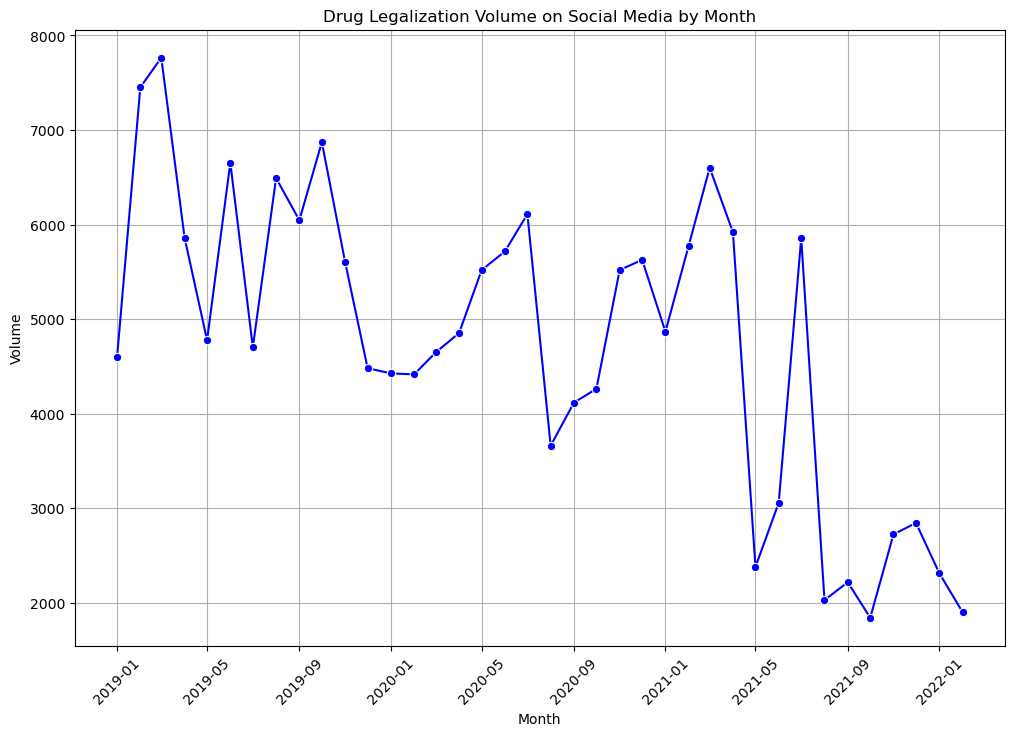

In [675]:
# Extract year and month from the 'date' column
drug_sm['YearMonth'] = drug_sm['date'].dt.to_period('M')

# Group by YearMonth and sum the volume
drug_sm_monthly = drug_sm.groupby('YearMonth')['mj_vol'].sum().reset_index()

# Convert YearMonth back to datetime for plotting
drug_sm_monthly['YearMonth'] = drug_sm_monthly['YearMonth'].dt.to_timestamp()

# Plot the data
plt.figure(figsize=(12, 8))
sns.lineplot(data=drug_sm_monthly, x='YearMonth', y='mj_vol', marker='o', color='blue')

plt.title('Drug Legalization Volume on Social Media by Month')
plt.xlabel('Month')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

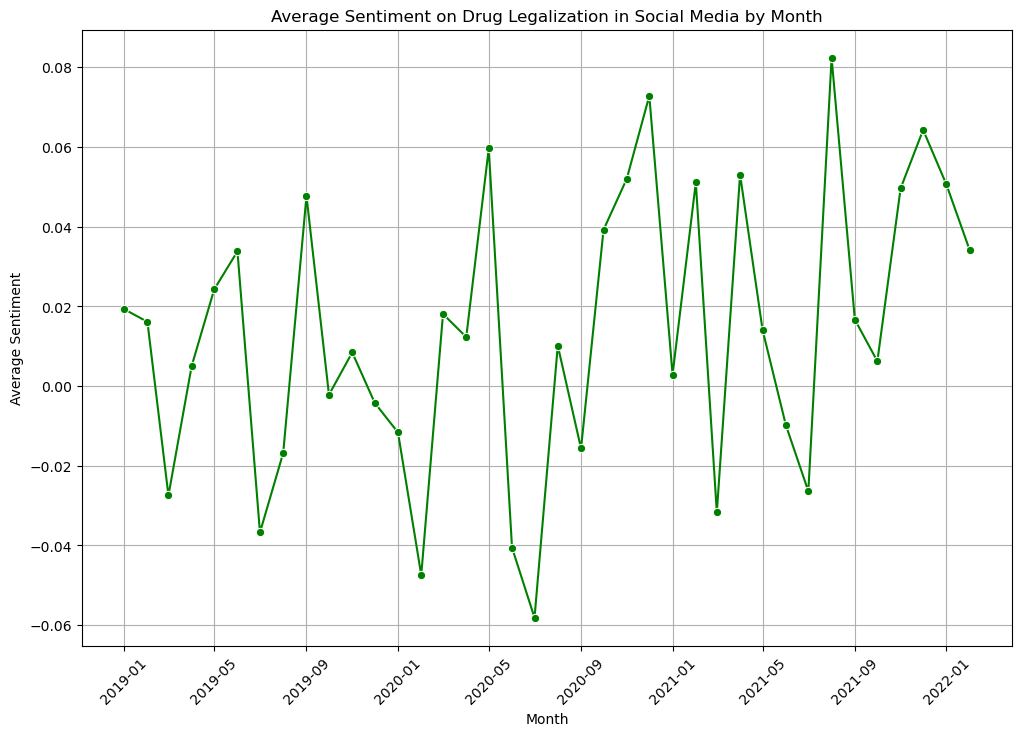

In [676]:
# Extract year and month from the 'date' column
social_media_df['YearMonth'] = social_media_df['date'].dt.to_period('M')

# Group by YearMonth and calculate the average sentiment for drugs
sentiment_by_month = social_media_df.groupby('YearMonth')['mj_vader_comp_avg'].mean().reset_index()

# Convert YearMonth back to datetime for plotting
sentiment_by_month['YearMonth'] = sentiment_by_month['YearMonth'].dt.to_timestamp()

# Plot the data
plt.figure(figsize=(12, 8))
sns.lineplot(data=sentiment_by_month, x='YearMonth', y='mj_vader_comp_avg', marker='o', color='green')

plt.title('Average Sentiment on Drug Legalization in Social Media by Month')
plt.xlabel('Month')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

/var/folders/5y/qk40s5mj3n330pjcftfym3180000gn/T/ipykernel_6448/3599733360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_wp['YearMonth'] = drug_wp['Date'].dt.to_period('M')
/var/folders/5y/qk40s5mj3n330pjcftfym3180000gn/T/ipykernel_6448/3599733360.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_nyt['YearMonth'] = drug_nyt['Date'].dt.to_period('M')
/var/folders/5y/qk40s5mj3n330pjcftfym3180000gn/T/ipykernel_6448/3599733360.py:4: SettingWithCopyWarning: 
A value is trying to be set on a cop

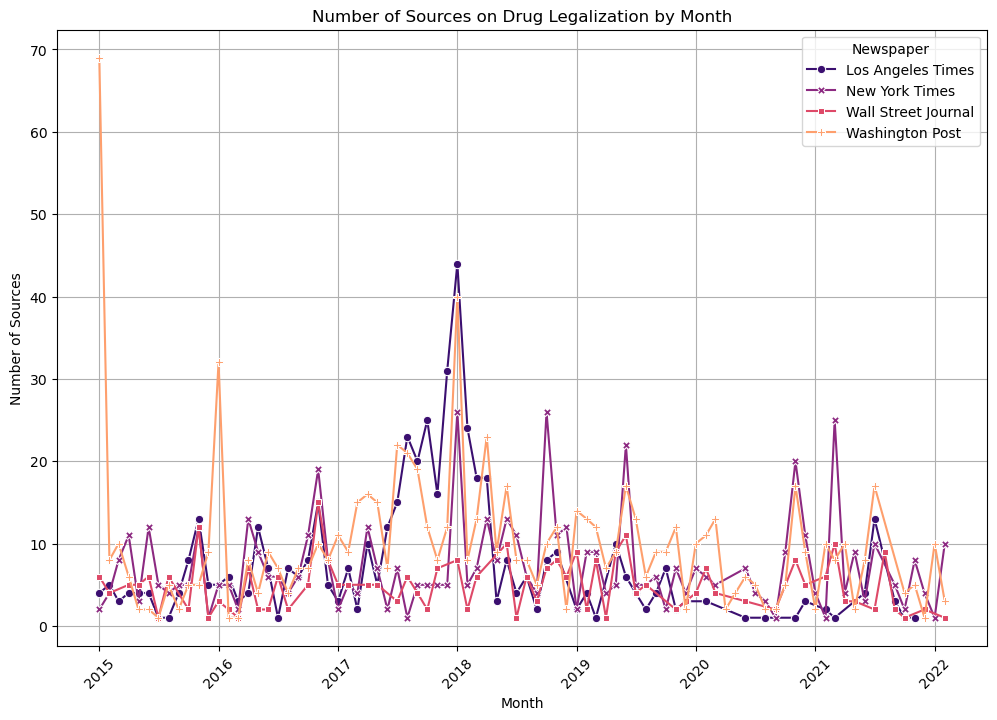

In [677]:
# Extract year and month from the 'Date' column for each newspaper DataFrame
drug_wp['YearMonth'] = drug_wp['Date'].dt.to_period('M')
drug_nyt['YearMonth'] = drug_nyt['Date'].dt.to_period('M')
drug_lat['YearMonth'] = drug_lat['Date'].dt.to_period('M')
drug_wsj['YearMonth'] = drug_wsj['Date'].dt.to_period('M')

# Add a label to each dataset
drug_wp['Newspaper'] = 'Washington Post'
drug_nyt['Newspaper'] = 'New York Times'
drug_lat['Newspaper'] = 'Los Angeles Times'
drug_wsj['Newspaper'] = 'Wall Street Journal'

# Combine all datasets into one
combined_data = pd.concat([drug_wp, drug_nyt, drug_lat, drug_wsj])

# Group by YearMonth and Newspaper to count the number of sources
sources_by_month = combined_data.groupby(['YearMonth', 'Newspaper']).size().reset_index(name='Count')

# Convert YearMonth back to datetime for plotting
sources_by_month['YearMonth'] = sources_by_month['YearMonth'].dt.to_timestamp()

# Plot the data
plt.figure(figsize=(12, 8))
sns.lineplot(data=sources_by_month, x='YearMonth', y='Count', hue='Newspaper', palette='magma', markers=True, style='Newspaper', dashes=False)

plt.title('Number of Sources on Drug Legalization by Month')
plt.xlabel('Month')
plt.ylabel('Number of Sources')
plt.xticks(rotation=45)
plt.legend(title='Newspaper')
plt.grid(True)
plt.show()

Correlation between social media sentiment and news coverage on drugs: -0.1109294735241769


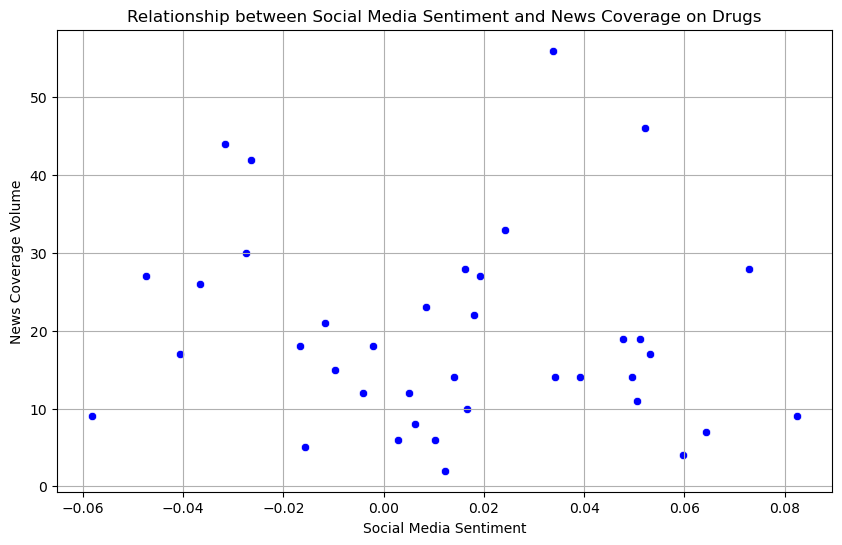

In [678]:
# Ensure the 'YearMonth' column is in datetime format for both datasets
sentiment_by_month['YearMonth'] = pd.to_datetime(sentiment_by_month['YearMonth'])
sources_by_month['YearMonth'] = pd.to_datetime(sources_by_month['YearMonth'])

# Filter news coverage data for the specific topic (e.g., Drug Legalization)
news_coverage = sources_by_month.groupby('YearMonth')['Count'].sum().reset_index()

# Group news coverage by month and sum the counts
news_coverage_monthly = news_coverage.groupby('YearMonth')['Count'].sum().reset_index()

# Merge social media sentiment data with news coverage data on 'YearMonth'
merged_data = pd.merge(sentiment_by_month, news_coverage_monthly, on='YearMonth', how='inner')

# Rename columns for clarity
merged_data.rename(columns={'mj_vader_comp_avg': 'Sentiment', 'Count': 'NewsCoverage'}, inplace=True)

# Calculate the correlation between sentiment and news coverage
correlation = merged_data['Sentiment'].corr(merged_data['NewsCoverage'])

print(f"Correlation between social media sentiment and news coverage on drugs: {correlation}")

# Plot the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='Sentiment', y='NewsCoverage', color='blue')
plt.title('Relationship between Social Media Sentiment and News Coverage on Drugs')
plt.xlabel('Social Media Sentiment')
plt.ylabel('News Coverage Volume')
plt.grid(True)
plt.show()

/var/folders/5y/qk40s5mj3n330pjcftfym3180000gn/T/ipykernel_6448/248645614.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_sm['SentimentDifference'] = drug_sm['mj_vader_pos_to_neg']
/var/folders/5y/qk40s5mj3n330pjcftfym3180000gn/T/ipykernel_6448/248645614.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_sm['YearMonth'] = drug_sm['YearMonth'].dt.to_timestamp()


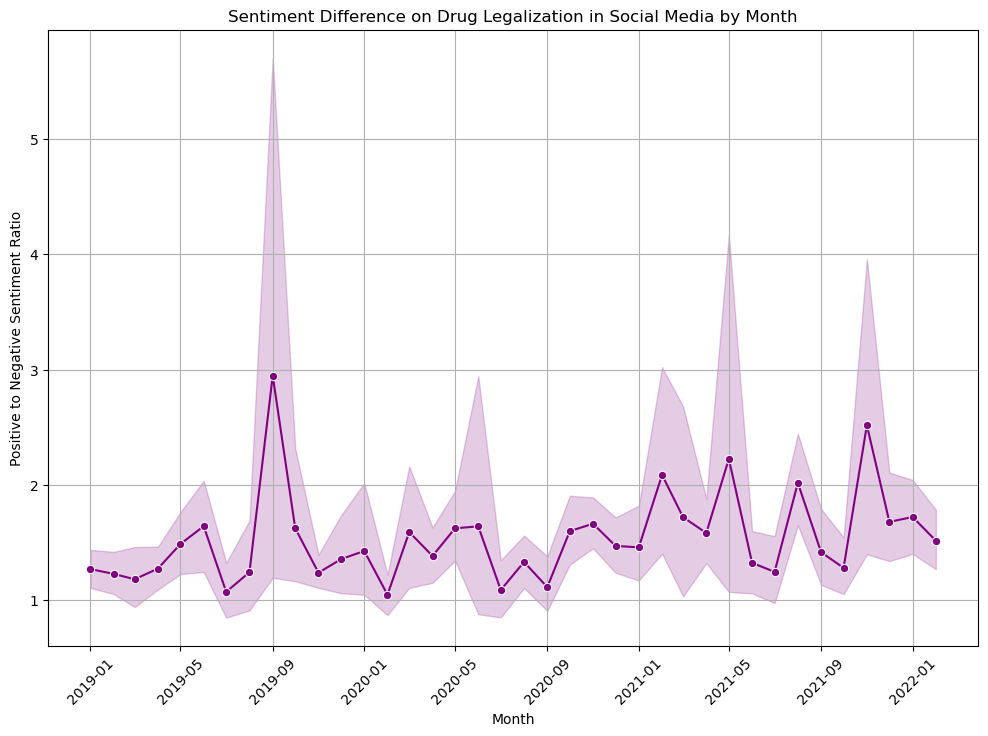

In [679]:
# Calculate the difference between positive and negative sentiment ratios
drug_sm['SentimentDifference'] = drug_sm['mj_vader_pos_to_neg']

# Convert 'YearMonth' to datetime for compatibility with plotting
drug_sm['YearMonth'] = drug_sm['YearMonth'].dt.to_timestamp()

# Plot the sentiment difference across time
plt.figure(figsize=(12, 8))
sns.lineplot(data=drug_sm, x='YearMonth', y='SentimentDifference', marker='o', color='purple')

plt.title('Sentiment Difference on Drug Legalization in Social Media by Month')
plt.xlabel('Month')
plt.ylabel('Positive to Negative Sentiment Ratio')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Correlation between sentiment difference and news reporting volume on drugs: -0.00645300491044485


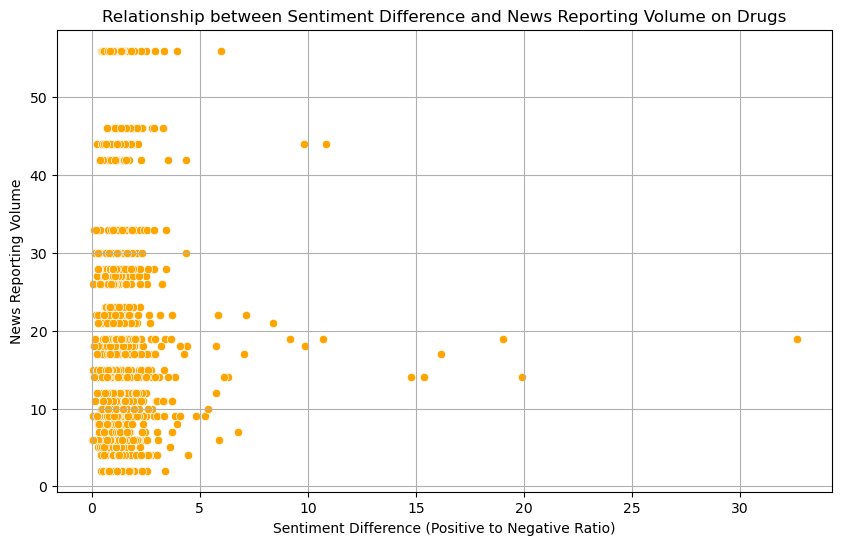

In [680]:
# Merge sentiment difference data with news coverage data on 'YearMonth'
sentiment_difference_data = drug_sm[['YearMonth', 'SentimentDifference']]
merged_relationship_data = pd.merge(sentiment_difference_data, news_coverage, on='YearMonth', how='inner')

# Rename columns for clarity
merged_relationship_data.rename(columns={'SentimentDifference': 'SentimentDiff', 'Count': 'NewsVolume'}, inplace=True)

# Calculate the correlation between sentiment difference and news volume
correlation_diff_volume = merged_relationship_data['SentimentDiff'].corr(merged_relationship_data['NewsVolume'])

print(f"Correlation between sentiment difference and news reporting volume on drugs: {correlation_diff_volume}")

# Plot the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_relationship_data, x='SentimentDiff', y='NewsVolume', color='orange')
plt.title('Relationship between Sentiment Difference and News Reporting Volume on Drugs')
plt.xlabel('Sentiment Difference (Positive to Negative Ratio)')
plt.ylabel('News Reporting Volume')
plt.grid(True)
plt.show()

Correlation between daily drug social media volume and newspaper volume: -0.0528809678365604


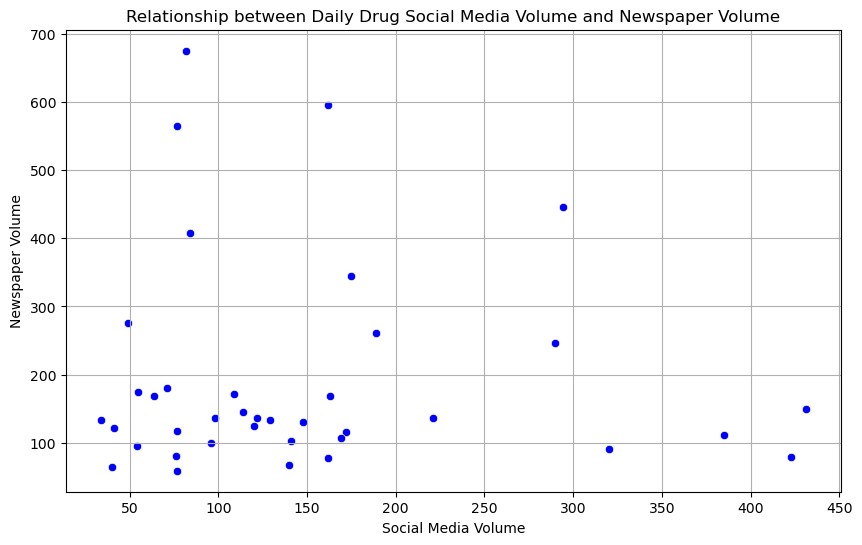

In [681]:
# Extract relevant columns for drug social media and newspaper reporting
drug_sm_daily = drug_sm[['date', 'mj_vol']]
drug_news_daily = sources_by_day[['Date', 'Count']]

# Merge the two datasets on the date
merged_drug_data_daily = pd.merge(drug_sm_daily, drug_news_daily, left_on='date', right_on='Date', how='inner')

# Rename columns for clarity
merged_drug_data_daily.rename(columns={'mj_vol': 'SocialMediaVolume', 'Count': 'NewspaperVolume'}, inplace=True)

# Calculate the correlation between social media volume and newspaper volume
correlation_daily = merged_drug_data_daily['SocialMediaVolume'].corr(merged_drug_data_daily['NewspaperVolume'])

print(f"Correlation between daily drug social media volume and newspaper volume: {correlation_daily}")

# Plot the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_drug_data_daily, x='SocialMediaVolume', y='NewspaperVolume', color='blue')
plt.title('Relationship between Daily Drug Social Media Volume and Newspaper Volume')
plt.xlabel('Social Media Volume')
plt.ylabel('Newspaper Volume')
plt.grid(True)
plt.show()

#### Time-Lagged correlation Analysis
Monthly analysis

In [682]:
# Prepare drug data for newspapers and social media
# Shift newspaper data by 1 month
sources_by_month['ShiftedCount'] = sources_by_month.groupby('Newspaper')['Count'].shift(1)

# Filter only drug data for newspapers
drug_news_volume = sources_by_month.groupby('YearMonth')['ShiftedCount'].sum().reset_index()

# Prepare social media data
drug_sm_volume = drug_sm_monthly[['YearMonth', 'mj_vol']]

# Merge the two datasets on 'YearMonth'
merged_data = pd.merge(drug_sm_volume, drug_news_volume, on='YearMonth', how='inner')

Time-lagged correlation (1 month): 0.31357468426087837


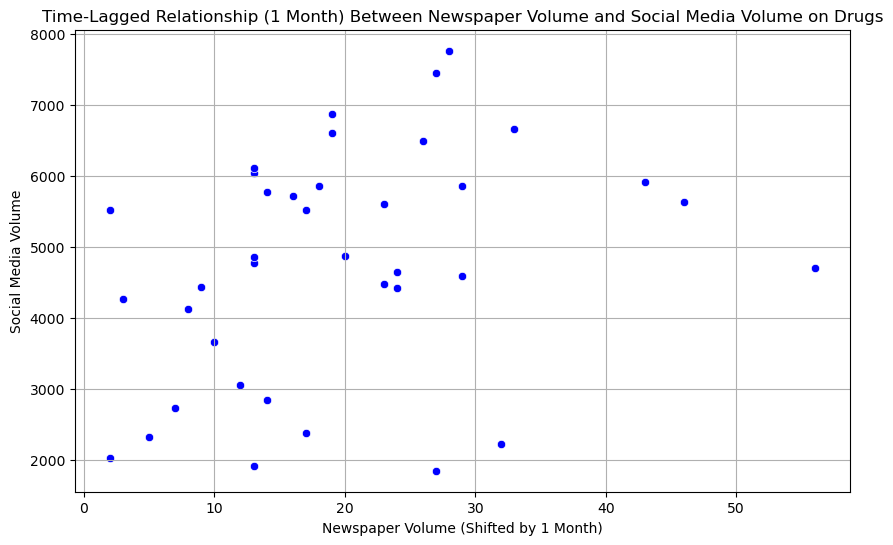

Time-lagged correlation (1 month(s)): 0.31357468426087837
Time-lagged correlation (2 month(s)): 0.13558736445557584
Time-lagged correlation (3 month(s)): 0.3666837099668378


In [683]:
# Calculate correlation for 1-month lag
correlation = merged_data['mj_vol'].corr(merged_data['ShiftedCount'])
print(f"Time-lagged correlation (1 month): {correlation}")

# Plot the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='ShiftedCount', y='mj_vol', color='blue')
plt.title('Time-Lagged Relationship (1 Month) Between Newspaper Volume and Social Media Volume on Drugs')
plt.xlabel('Newspaper Volume (Shifted by 1 Month)')
plt.ylabel('Social Media Volume')
plt.grid(True)
plt.show()

# Analyze multiple time lags
for lag in range(1, 4):  # Test lags of 1, 2, and 3 months
    sources_by_month['ShiftedCount'] = sources_by_month.groupby('Newspaper')['Count'].shift(lag)
    drug_news_volume = sources_by_month.groupby('YearMonth')['ShiftedCount'].sum().reset_index()
    merged_data = pd.merge(drug_sm_monthly, drug_news_volume, on='YearMonth', how='inner')
    correlation = merged_data['mj_vol'].corr(merged_data['ShiftedCount'])
    print(f"Time-lagged correlation ({lag} month(s)): {correlation}")

Daily Analysis

In [684]:
# Convert 'Date' columns to datetime format if not already done
sources_by_month['Date'] = pd.to_datetime(sources_by_month['YearMonth'])  # Assuming 'YearMonth' is the column
drug_sm['date'] = pd.to_datetime(drug_sm['date'])

# Group newspaper data by daily dates
sources_by_day = sources_by_month.groupby('Date')['Count'].sum().reset_index()

# Group social media data by daily dates
drug_sm_daily = drug_sm.groupby('date')['mj_vol'].sum().reset_index()

# Shift newspaper data by 1 day
sources_by_day['ShiftedCount'] = sources_by_day['Count'].shift(1)

# Merge the two datasets on daily dates
merged_daily_data = pd.merge(drug_sm_daily, sources_by_day, left_on='date', right_on='Date', how='inner')

/var/folders/5y/qk40s5mj3n330pjcftfym3180000gn/T/ipykernel_6448/367288008.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_sm['date'] = pd.to_datetime(drug_sm['date'])


Time-lagged correlation (1 day): 0.1356093956230661


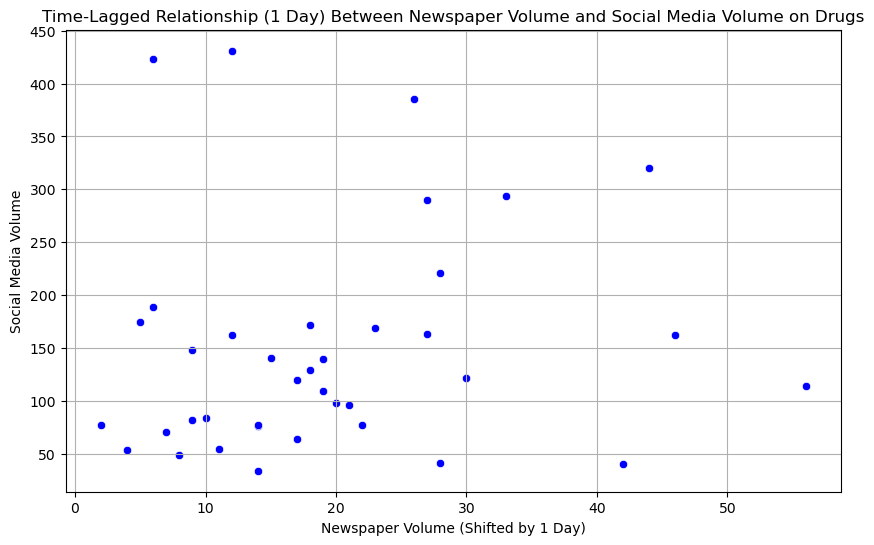

Time-lagged correlation (1 day(s)): 0.1356093956230661
Time-lagged correlation (2 day(s)): 0.20508845511751078
Time-lagged correlation (3 day(s)): 0.18624516462058277
Time-lagged correlation (4 day(s)): 0.13044142600561778
Time-lagged correlation (5 day(s)): 0.08109889868707762
Time-lagged correlation (6 day(s)): -0.03825888335127427
Time-lagged correlation (7 day(s)): 0.13214481888957955
Time-lagged correlation (8 day(s)): 0.16718330760405284
Time-lagged correlation (9 day(s)): -0.08729713938022807


In [685]:
# Calculate correlation for 2-day lag
sources_by_day['ShiftedCount'] = sources_by_day['Count'].shift(1)
correlation = merged_daily_data['mj_vol'].corr(merged_daily_data['ShiftedCount'])
print(f"Time-lagged correlation (1 day): {correlation}")

# Plot the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_daily_data, x='ShiftedCount', y='mj_vol', color='blue')
plt.title('Time-Lagged Relationship (1 Day) Between Newspaper Volume and Social Media Volume on Drugs')
plt.xlabel('Newspaper Volume (Shifted by 1 Day)')
plt.ylabel('Social Media Volume')
plt.grid(True)
plt.show()

# Analyze multiple time lags
for lag in range(1, 10):  # Test lags of 1, 2, and 3 days
    sources_by_day['ShiftedCount'] = sources_by_day['Count'].shift(lag)
    merged_daily_data = pd.merge(drug_sm_daily, sources_by_day, left_on='date', right_on='Date', how='inner')
    correlation = merged_daily_data['mj_vol'].corr(merged_daily_data['ShiftedCount'])
    print(f"Time-lagged correlation ({lag} day(s)): {correlation}")

## Event Analysis

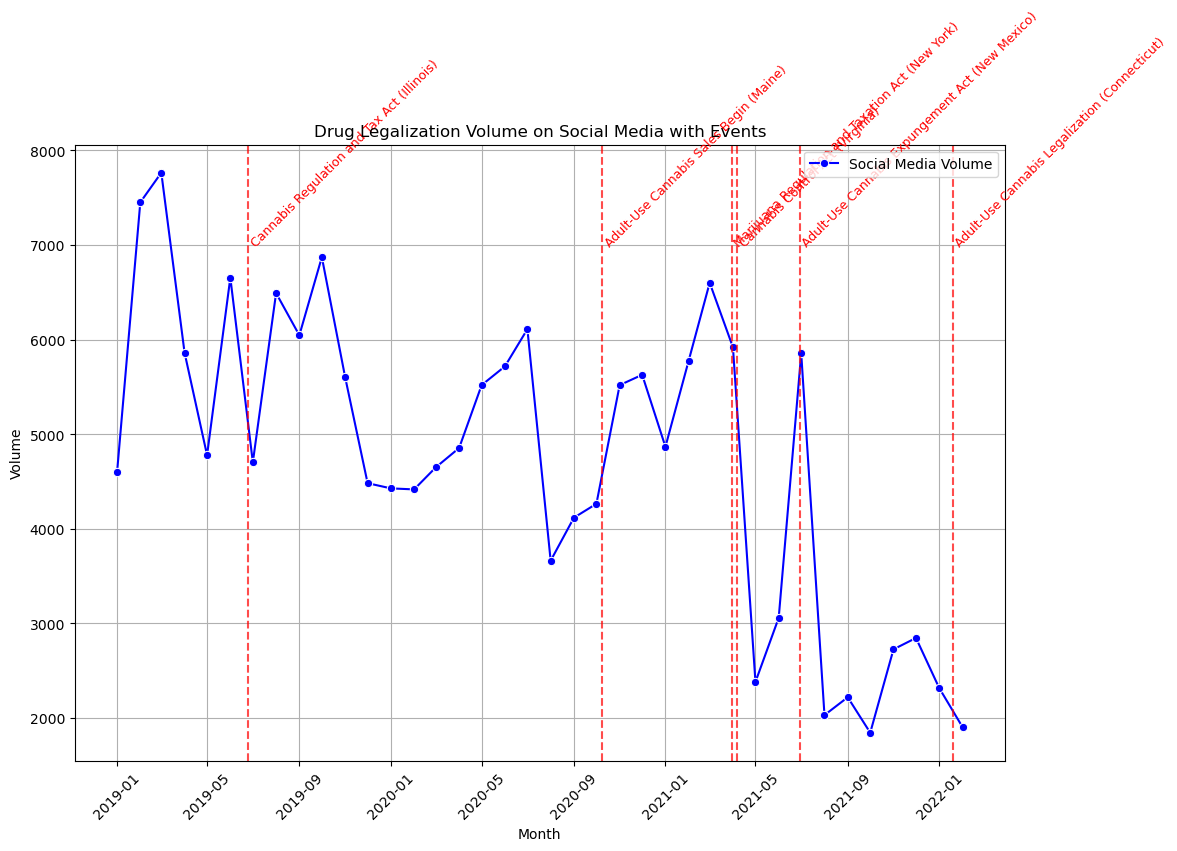

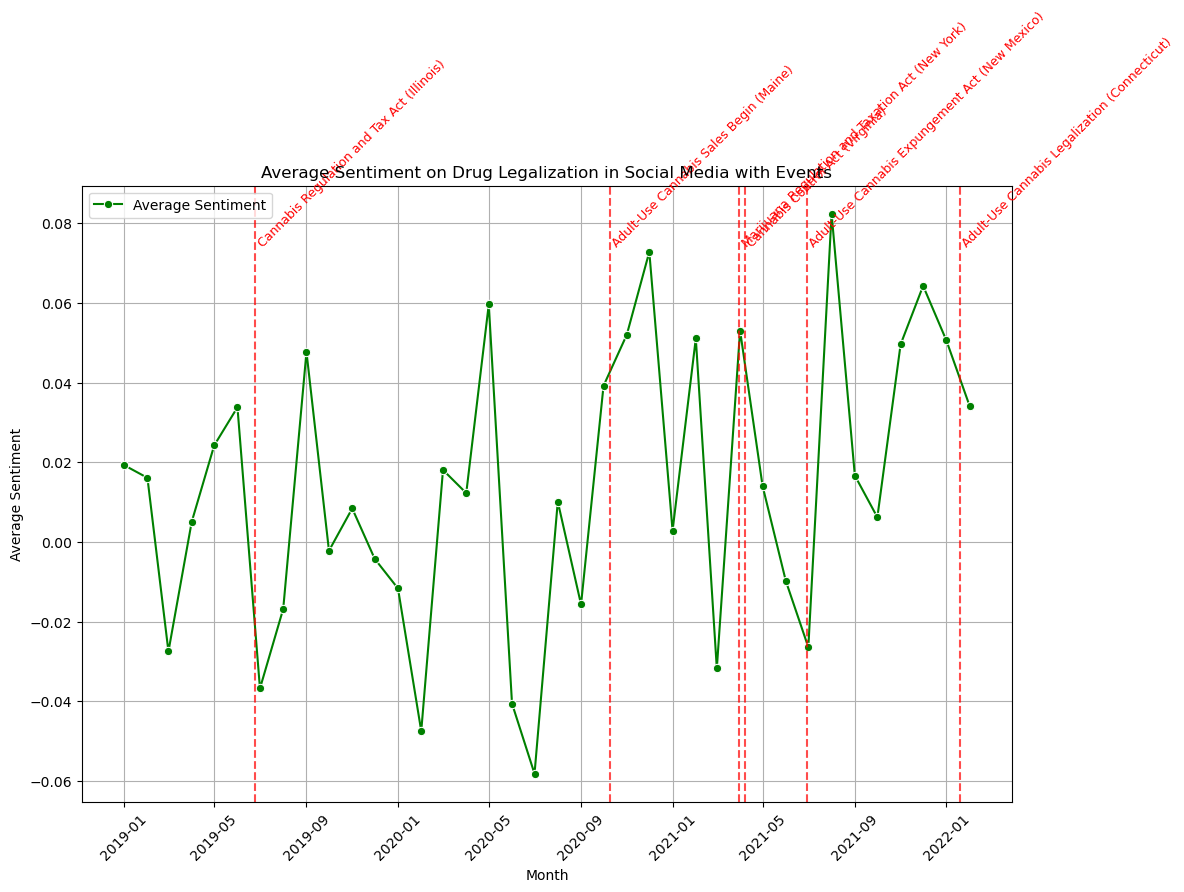

                                              Event       Date  AvgSentiment  \
0        Cannabis Regulation and Tax Act (Illinois) 2019-06-25      0.061964   
1            Adult-Use Cannabis Sales Begin (Maine) 2020-10-09      0.037049   
2  Marijuana Regulation and Taxation Act (New York) 2021-03-31      0.066972   
3                   Cannabis Control Act (Virginia) 2021-04-07      0.042951   
4   Adult-Use Cannabis Expungement Act (New Mexico) 2021-06-29     -0.084935   
5     Adult-Use Cannabis Legalization (Connecticut) 2022-01-19      0.081976   

   SocialMediaVolume  
0             3755.0  
1             2424.0  
2             3903.0  
3             3295.0  
4             4258.0  
5             1351.0  


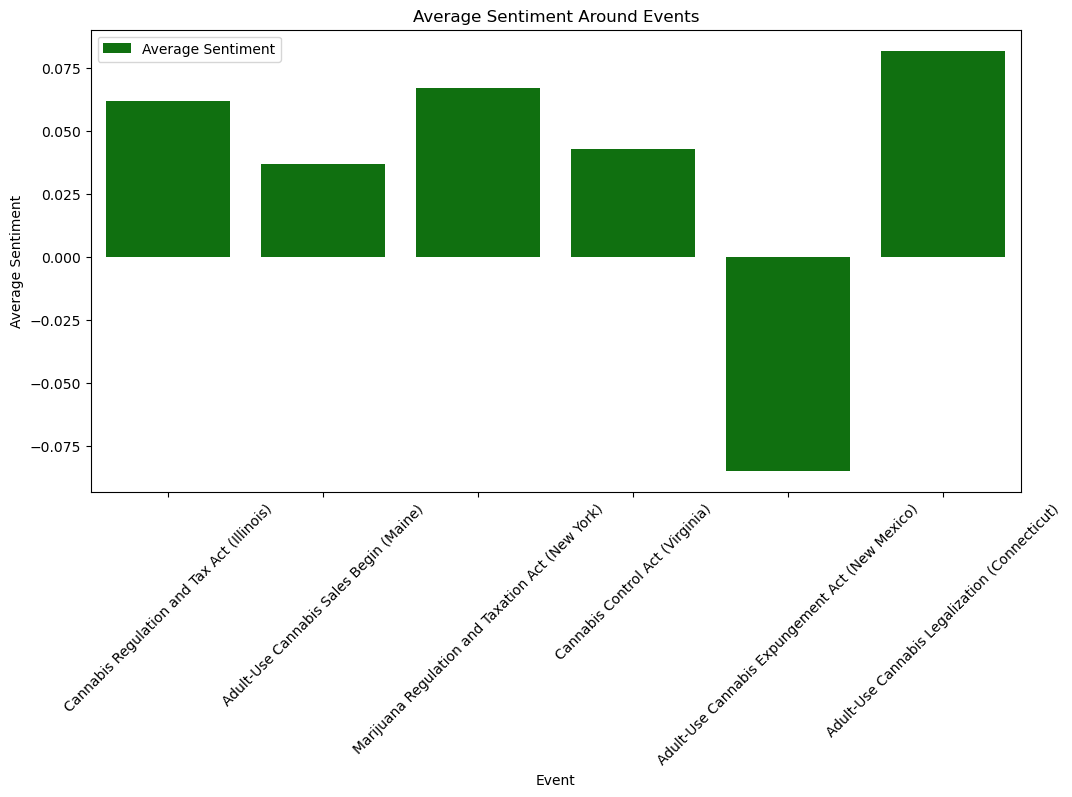

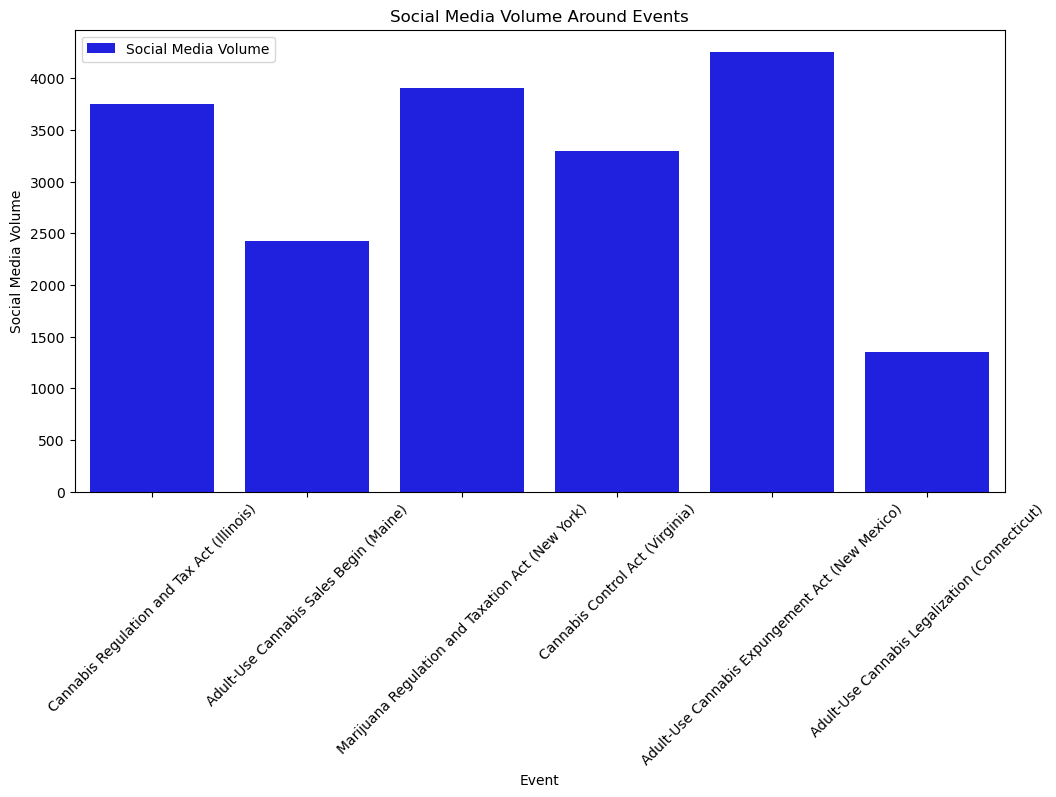

In [686]:
# Define drug legalization-related events
events = {
    "Cannabis Regulation and Tax Act (Illinois)": "2019-06-25",
    "Adult-Use Cannabis Sales Begin (Maine)": "2020-10-09",
    "Marijuana Regulation and Taxation Act (New York)": "2021-03-31",
    "Cannabis Control Act (Virginia)": "2021-04-07",
    "Adult-Use Cannabis Expungement Act (New Mexico)": "2021-06-29",
    "Adult-Use Cannabis Legalization (Connecticut)": "2022-01-19"
}

# Convert event dates to datetime
events_df = pd.DataFrame(list(events.items()), columns=["Event", "Date"])
events_df["Date"] = pd.to_datetime(events_df["Date"])

# Plot Drug Legalization Volume on Social Media with Event Markers
plt.figure(figsize=(12, 8))
sns.lineplot(data=drug_sm_monthly, x='YearMonth', y='mj_vol', marker='o', color='blue', label='Social Media Volume')
for _, row in events_df.iterrows():
    plt.axvline(x=row['Date'], color='red', linestyle='--', alpha=0.7)
    plt.text(row['Date'], drug_sm_monthly['mj_vol'].max() * 0.9, row['Event'], rotation=45, color='red', fontsize=9)
plt.title('Drug Legalization Volume on Social Media with Events')
plt.xlabel('Month')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

# Plot Average Sentiment on Drug Legalization in Social Media with Event Markers
plt.figure(figsize=(12, 8))
sns.lineplot(data=sentiment_by_month, x='YearMonth', y='mj_vader_comp_avg', marker='o', color='green', label='Average Sentiment')
for _, row in events_df.iterrows():
    plt.axvline(x=row['Date'], color='red', linestyle='--', alpha=0.7)
    plt.text(row['Date'], sentiment_by_month['mj_vader_comp_avg'].max() * 0.9, row['Event'], rotation=45, color='red', fontsize=9)
plt.title('Average Sentiment on Drug Legalization in Social Media with Events')
plt.xlabel('Month')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

# Analyze changes in social media volume and sentiment around each event
event_analysis_results = []

for _, row in events_df.iterrows():
    event_date = row["Date"]
    event_name = row["Event"]

    # Define a time window (7 days before and after the event)
    start_date = event_date - pd.Timedelta(days=7)
    end_date = event_date + pd.Timedelta(days=7)

    # Filter social media data for the time window
    sm_filtered = drug_sm[(drug_sm['date'] >= start_date) & (drug_sm['date'] <= end_date)]

    # Calculate average sentiment and total volume for social media
    avg_sentiment = sm_filtered['mj_vader_comp_avg'].mean()
    total_sm_volume = sm_filtered['mj_vol'].sum()

    # Append results to the list
    event_analysis_results.append({
        "Event": event_name,
        "Date": event_date,
        "AvgSentiment": avg_sentiment,
        "SocialMediaVolume": total_sm_volume
    })

# Convert results to a DataFrame
event_analysis_df = pd.DataFrame(event_analysis_results)

# Display the results
print(event_analysis_df)

# Plot changes in average sentiment around events
plt.figure(figsize=(12, 6))
sns.barplot(data=event_analysis_df, x="Event", y="AvgSentiment", color="green", label="Average Sentiment")
plt.ylabel("Average Sentiment")
plt.xticks(rotation=45)
plt.title("Average Sentiment Around Events")
plt.legend()
plt.show()

# Plot social media volume around events
plt.figure(figsize=(12, 6))
sns.barplot(data=event_analysis_df, x="Event", y="SocialMediaVolume", color="blue", label="Social Media Volume")
plt.ylabel("Social Media Volume")
plt.xticks(rotation=45)
plt.title("Social Media Volume Around Events")
plt.legend()
plt.show()

## Filtering for Mandatory Vaccination

In [687]:
vacc_wp = all_wp[all_wp['Subject Terms'].str.contains('Vaccines|Immunization|vaccines', case=False, na=False)]
vacc_nyt = all_nyt[all_nyt['Subject Terms'].str.contains('Vaccines|Immunization|vaccines', case=False, na=False)]
vacc_lat = all_lat[all_lat['Subject Terms'].str.contains('Vaccines|Immunization|vaccines', case=False, na=False)]
vacc_wsj = all_wsj[all_wsj['Subject Terms'].str.contains('Vaccines|Immunization|vaccines', case=False, na=False)]

/var/folders/5y/qk40s5mj3n330pjcftfym3180000gn/T/ipykernel_6448/1594665483.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vacc_wp['Newspaper'] = 'Washington Post'
/var/folders/5y/qk40s5mj3n330pjcftfym3180000gn/T/ipykernel_6448/1594665483.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vacc_nyt['Newspaper'] = 'New York Times'
/var/folders/5y/qk40s5mj3n330pjcftfym3180000gn/T/ipykernel_6448/1594665483.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

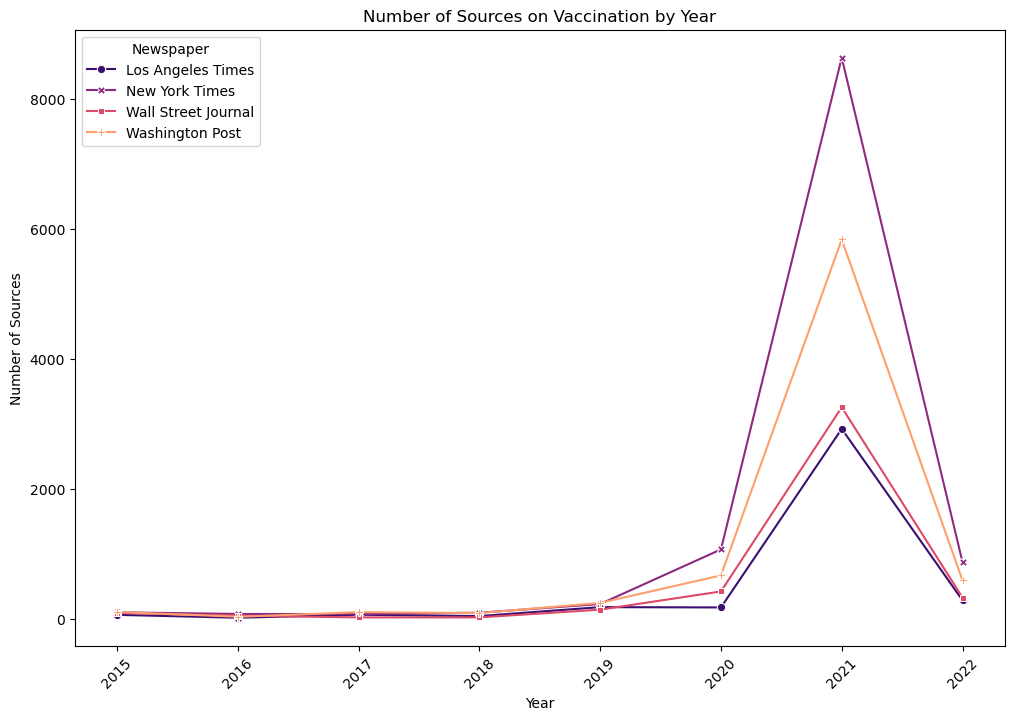

In [688]:
# Add a label to each dataset
vacc_wp['Newspaper'] = 'Washington Post'
vacc_nyt['Newspaper'] = 'New York Times'
vacc_lat['Newspaper'] = 'Los Angeles Times'
vacc_wsj['Newspaper'] = 'Wall Street Journal'

# Combine all datasets into one
combined_data = pd.concat([vacc_wp, vacc_nyt, vacc_lat, vacc_wsj])

# Group by Year and Newspaper to count the number of sources
sources_by_year = combined_data.groupby(['Year', 'Newspaper']).size().reset_index(name='Count')

# Plot the data
plt.figure(figsize=(12, 8))
sns.lineplot(data=sources_by_year, x='Year', y='Count', hue='Newspaper', palette='magma', markers=True, style='Newspaper', dashes=False)

plt.title('Number of Sources on Vaccination by Year')
plt.xlabel('Year')
plt.ylabel('Number of Sources')
plt.xticks(rotation=45)
plt.legend(title='Newspaper')
plt.show()

In [689]:
annual_df

NameError: name 'annual_df' is not defined